# Исследование бизнес-показателей приложения Procrastinate Pro+

В нашем распоряжении данные за несколько месяцев о посещениях развлекательного приложения Procrastinate Pro+ новыми пользователями, которые зарегистрировались в период с 1 мая по 27 октября 2019 года.  А также выгрузка их покупок и статистика рекламных расходов за этот период.

**Цель исследования**<br>
Определить причины убыточности бизнеса в данный период. 

Для этого предстоит изучить:
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

**Практическая значимость**<br>Результаты исследования помогут дать ценные рекомендации отделу маркетинга, скорректировать направление проводимых рекламных компаний, за счет чего добиться окупаемости пользователей из всех стран, по всем каналам привлечения и использующих все виды устройств для запуска приложения.

**Ход исследования**<br>
Данные о визитах клиентов их заказах, а также данные о расходах компании на рекламу хранятся в файлах visits_info_short.csv, orders_info_short.csv и costs_info_short.csv соответственно. О качестве данных ничего неизвестно, поэтому выполним **обзор** и **предобработку данных** (оптимизируем данные для анализа, проверим на пропуски, дубликаты, приведем данные к нужному типу). 

Далее **создадим функции**  для получения расширенных **профилей пользователей** из имеющихся данных, для расчета и анализа удержания (**Retention Rate**), конверсии(**Conversion Rate**), пожизненной ценности(**LTV**) и окупаемости инвестиции(**ROI**), а также функции для визуализации этих метрик.

После чего выполним **исследовательский анализ** данных, в ходе которого рассчитаем минимальную и максимальную даты привлечения пользователей. Перечень и топ устройств, с которых заходят пользователи. Распределение платящих пользователей по странам и каналам. 

Изучим затраты на **маркетинг**. Выясним общую сумму расходов на рекламу, а также расходы по каналам, среднюю стоимость одного пользователя.

**Оцените окупаемость рекламы** для этого проанализируйем графики LTV и ROI, а также графики динамики LTV, CAC и ROI. Проанализируем окупаемость рекламы с разбивкой по рекламным каналам и с разбивкой по странам. Изучим удержание и конверсию с разбивкой по устройствам, каналам и странам. Итогом будут являться ответы на вопросы:
* Окупается ли реклама в целом?
* Какие устройства, страны и каналы могут снижать окупаемость рекламы?
* Чем могут быть вызваны проблемы окупаемости?

Опишем возможные причины обнаруженных проблем, причины неэффективности привлечения пользователей. Передадим свои наблюдения в отдел маркетинга и сформулируем рекомендации по коррекции рекламных компаний.

## Обзор и предобработка данных

Ознакомимся с данными

In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat


In [2]:
try: 
    visits, orders, costs = (
        pd.read_csv('/datasets/visits_info_short.csv'), # журнал сессий
        pd.read_csv('/datasets/orders_info_short.csv'), # покупки
        pd.read_csv('/datasets/costs_info_short.csv')   # траты на рекламу
    )

except: 
    visits, orders, costs = (
        pd.read_csv('visits_info_short.csv'),
        pd.read_csv('orders_info_short.csv'),
        pd.read_csv('costs_info_short.csv')
    )

display(visits.sample(5), orders.sample(5), costs.sample(5))

User Id         Region   Device         Channel  \
261321  127677666288        Germany  Android         organic   
186585  420731170573  United States      Mac         organic   
22248   232998973610  United States   iPhone    MediaTornado   
199779  371413783647  United States   iPhone          TipTop   
254475  570897109944        Germany  Android  lambdaMediaAds   

              Session Start          Session End  
261321  2019-08-14 02:31:34  2019-08-14 02:37:42  
186585  2019-10-14 15:45:01  2019-10-14 16:30:45  
22248   2019-05-24 16:47:19  2019-05-24 17:04:07  
199779  2019-10-24 13:21:55  2019-10-24 13:41:16  
254475  2019-08-03 01:43:11  2019-08-03 02:38:24

User Id             Event Dt  Revenue
3752   626500605135  2019-06-16 20:16:58     4.99
3348    43579690586  2019-06-13 18:11:19     4.99
33289  422495237369  2019-08-16 09:34:11     4.99
25771   80912408630  2019-10-21 12:59:53     4.99
28278  728484043959  2019-05-16 05:54:17     4.99

dt         Channel   costs
771   2019-06-21         YRabbit    3.60
946   2019-06-16      AdNonSense   23.10
825   2019-08-14         YRabbit    3.36
657   2019-08-26          TipTop  366.00
1662  2019-06-12  lambdaMediaAds    5.60

Перед нами произвольные пять строк каждой из загруженных таблиц. Ознакомимся подробнее с каждой из них

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


В таблице, содержащей информацио об использовании приложения пользователями, 309901 строк, 6 столбцов. Данные всех столбцов имеют тип `object`, кроме столбца `user_id`, его тип `int64`. Пропусков в данных нет.

Согласно документации к данным:

- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

Заметим также, что данные столбцов `Session Start`, `Session End` необходимо привести к типу datetime64. Сделаем это и "лоуризацию" с приведением к змеиному стилю названий столбцов после просмотра информации оставшихся двух таблиц.   

In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


В таблице, содержащей информацию о покупках, 40212 строк, 3 столбца `User id` имеет тип `int64`, `Event Dt` - `object`, `Revenue` - `float64`. Пропусков в данных нет.

Согласно документации к данным:

- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

Данные столбца `Event Dt` также нуждаются в смене типа.

In [5]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В таблице, содержащей информацию о расходах на рекламу, 1800 строк, 3 столбца. Данные столбца `Costs` имеют тип `float64`, данных оставшихся столбцов - `object`.

Согласно документации к данным:

- `Dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `Costs` — расходы на эту кампанию.

Данные столбца `Dt` требуют смены типа. И дополнительно переименуем его в `adv_dt` (advertising date).

Приведем названия столбцов к нижнему регистру и змеиному стилю

In [6]:
# приводим к нижнему регистру
df = [visits, orders, costs]
for values in df:
    values.columns = values.columns.str.lower() 

# приводим к змеиному стилю

visits, orders, costs = (
    visits.rename(columns=lambda x: x.replace(' ', '_')),
    orders.rename(columns=lambda x: x.replace(' ', '_')),
    costs.rename(columns=lambda x: x.replace(' ', '_'))
)


display(list(visits), list(orders), list(costs))

['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

['user_id', 'event_dt', 'revenue']

['dt', 'channel', 'costs']

Готово.<br>Приведем к типу datetime64 столбцы `session_stat`, `session_end`, `event_dt`.

In [7]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

# проверим
visits.info()
print()
orders.info()
print()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942

Готово, получили нужные типы в указанных столбцах.

Проверим данные на явные дубликаты.

In [8]:
lst = ['visits', 'orders', 'costs']
for values, i in zip(df, lst):
    print('Явных дубликатов в таблице', i, ':', values.duplicated().sum())

Явных дубликатов в таблице visits : 0
Явных дубликатов в таблице orders : 0
Явных дубликатов в таблице costs : 0


Явных дубликатов не обнаружили. Проверим на неявные. 

D таблице `visits` это могут быть различные написания (регистр) в столбце `region`, `device`, `channel`.
Выведем списки уникальных знаяений столбцов таблицы и их количество

In [9]:
for name in visits.columns.tolist():
    print('Столбец', name)
    print(visits[name].value_counts())
    print("Всего уникальных значений:", len(visits[name].unique()))
    print()

Столбец user_id
33606575057     46
943775408561    36
901180916748    35
870784569391    34
764086596354    33
                ..
214203066007     1
369265191867     1
346271445800     1
133742530598     1
279181973476     1
Name: user_id, Length: 150008, dtype: int64
Всего уникальных значений: 150008

Столбец region
United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64
Всего уникальных значений: 4

Столбец device
iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64
Всего уникальных значений: 4

Столбец channel
organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64
Всего уникальных знач

Указанных различий в регистрах не обнаружено. Зато можем точно сказать, что имеем дело с 4 регионами - США, Великобритании, Франция, Германия. Пользователи используют для запуска приложения 4 вида устройств - айфон, смартфоны на андройде, Мак или ПК. Каналов привлечения пользователей 11.

Выполним аналогиную операцию с таблицей `costs`

In [10]:
for name in costs.columns.tolist():
    print('Столбец', name)
    print(costs[name].value_counts())
    print("Всего уникальных значений:", len(costs[name].unique()))
    print()

Столбец dt
2019-05-01    10
2019-08-22    10
2019-08-24    10
2019-08-25    10
2019-08-26    10
              ..
2019-07-01    10
2019-07-02    10
2019-07-03    10
2019-07-04    10
2019-10-27    10
Name: dt, Length: 180, dtype: int64
Всего уникальных значений: 180

Столбец channel
FaceBoom              180
MediaTornado          180
RocketSuperAds        180
TipTop                180
YRabbit               180
AdNonSense            180
LeapBob               180
OppleCreativeMedia    180
WahooNetBanner        180
lambdaMediaAds        180
Name: channel, dtype: int64
Всего уникальных значений: 10

Столбец costs
6.40      26
3.36      21
9.60      20
16.80     19
11.55     17
          ..
203.30     1
184.30     1
186.20     1
172.90     1
2.40       1
Name: costs, Length: 608, dtype: int64
Всего уникальных значений: 608



Аналогичный предыдущей таблице результат. Замечаем 10 уникальных каналов привлечения пользователей (в visits было 11), так как канал `organic` не нуждается в финансировании (пользователь сам нашел приложение и запустил). По 180 рекламных кампаний было запущено на каждом из каналов.

Выведем информацию о среднем, минимальном и максимальном расходах на рекламную компанию.

In [11]:
 print('median', round(costs['costs'].median(), 2))

costs.describe() 

median 12.29


costs
count  1800.000000
mean     58.609611
std     107.740223
min       0.800000
25%       6.495000
50%      12.285000
75%      33.600000
max     630.000000

Медиана расхода около 12 у.е. Средний расход на рекламную компанию составляет почти 59 у.е., минимальный - 0.8 у.е., максимальный - 630 у.е.

**ВЫВОДЫ**<br>
Обзор данных показал, что в таблицах `visits`, `orders`, `costs` содержится информация о пользователях, времени запуска приложения и стоимости рекламных компаний. <br>
Выполнили следующие действия по предобработке:
- привели названия столбцов к нижнему регистру и змеиному стилю;
- Привели данные столбцов, содержащих время совершения той или оной операции, к нужным форматам; 
- Проверили данные на явные дубликаты (их нет);
- Вывели таблицы уникальных значений и их количества для каждого столбца трех таблиц;
- Вывели медиану, среднее и стандартное отклонение затрат на рекламную компанию, увидели, что стоимость рекламной компании варьируется от 0.8 у.е. до 630 у.е. Так как среднее меньше медианы, то мы имеем дело с набором данных, который имеет распределение с положительной ассимметрией. Другими словами большие значения `costs` встречаются сильно реже малых.

Регионы, устройства и каналы указанные в данных:<br>
- США, Великобритания, Франция, Германия.
- iPhone, Android, PC, Mac.
- Organic, TipTop, FaceBoom, WahooNetBanner, LeapBob, OppleCreativeMedia, RocketSuperAds, YRabbit, MediaTornado, AdNonSense, lambdaMediaAds.

## Профили пользователей, функции для расчета и анализа удержания (Retention Rate), конверсии(Conversion Rate), пожизненной ценности(LTV) и окупаемости инвестиции(ROI)

### Профили пользователей

Начнем с создания расширенных профилей пользователей. Напишем для этого функцию *get_profiles( )*

In [12]:
def get_profiles(sessions, orders, costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Готово, проверим на работоспособность. Составим профили пользователей по имеющимся данным.

In [13]:
profiles = get_profiles(visits, orders, costs)
display(profiles.head())

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

Работает! Перед нами 5 строк указанной таблицы.<br>


### Retention Rate

Напишем функцию *get_retention( )* для расчета удержания.

In [14]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и таблицу профилей
    return result_raw, result_grouped, result_in_time

Готово, проверим работу функции на наших данных, момент анализа данных 13 мая 2019 года и горизонт в 6 дней с группировкой по устройствам.

In [15]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, datetime(2019, 5, 13).date(), 6, dimensions=['device'])

display(retention_raw.head(), retention.head(10), retention_history.sample(10))

user_id            first_ts   channel  device         region          dt  \
0    599326 2019-05-07 20:58:57  FaceBoom     Mac  United States  2019-05-07   
1    599326 2019-05-07 20:58:57  FaceBoom     Mac  United States  2019-05-07   
2    599326 2019-05-07 20:58:57  FaceBoom     Mac  United States  2019-05-07   
3  93239833 2019-05-08 11:03:40   organic  iPhone  United States  2019-05-08   
4  93239833 2019-05-08 11:03:40   organic  iPhone  United States  2019-05-08   

       month  payer  acquisition_cost       session_start  lifetime  
0 2019-05-01   True          1.088172 2019-05-07 20:58:57         0  
1 2019-05-01   True          1.088172 2019-05-08 06:00:42         0  
2 2019-05-01   True          1.088172 2019-05-09 07:33:16         1  
3 2019-05-01  False          0.000000 2019-05-08 11:03:40         0  
4 2019-05-01  False          0.000000 2019-05-09 14:58:30         1

cohort_size    0         1         2         3         4  \
payer device                                                              
False Android         1595  1.0  0.183072  0.089655  0.053292  0.029467   
      Mac             1382  1.0  0.177279  0.087554  0.052822  0.026773   
      PC              1360  1.0  0.182353  0.095588  0.055882  0.030882   
      iPhone          2501  1.0  0.178329  0.089564  0.053579  0.035186   
True  Android           87  1.0  0.471264  0.344828  0.310345  0.252874   
      Mac               68  1.0  0.455882  0.294118  0.205882  0.220588   
      PC                64  1.0  0.484375  0.437500  0.328125  0.296875   
      iPhone           128  1.0  0.515625  0.375000  0.328125  0.320312   

                      5  
payer device             
False Android  0.024451  
      Mac      0.023878  
      PC       0.025000  
      iPhone   0.020392  
True  Android  0.287356  
      Mac      0.279412  
      PC       0.234375  
      iPhone   0.210938

cohort_size    0         1         2         3  \
payer device  dt                                                           
True  iPhone  2019-05-03           14  1.0  0.428571  0.357143  0.214286   
      PC      2019-05-06           13  1.0  0.384615  0.538462  0.230769   
False Mac     2019-05-01          185  1.0  0.183784  0.081081  0.032432   
      iPhone  2019-05-08          269  1.0  0.182156  0.107807  0.040892   
True  PC      2019-05-05            6  1.0  0.666667  0.166667  0.333333   
      Android 2019-05-06           18  1.0  0.444444  0.333333  0.277778   
False PC      2019-05-01          170  1.0  0.188235  0.058824  0.064706   
              2019-05-08          142  1.0  0.140845  0.105634  0.042254   
      iPhone  2019-05-02          261  1.0  0.160920  0.099617  0.049808   
      Mac     2019-05-07          170  1.0  0.170588  0.064706  0.064706   

                                 4         5  
payer device  dt                              
True  iPhone  2019-05-03  0.571429  0.357143  
      PC      2019-05-06  0.153846  0.230769  
False Mac     2019-05-01  0.037838  0.021622  
      iPhone  2019-05-08  0.029740  0.022305  
True  PC      2019-05-05  0.166667  0.333333  
      Android 2019-05-06  0.277778  0.222222  
False PC      2019-05-01  0.029412  0.035294  
              2019-05-08  0.042254  0.000000  
      iPhone  2019-05-02  0.030651  0.022989  
      Mac     2019-05-07  0.011765  0.023529

Работает! Получили три таблицы: 
- Профили пользователей; 
- Удержание; 
- Динамика удержания.

### Conversion Rate

Напишем функцию *get_conversion( )* для расчета конверсии

In [16]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и таблицу профилей
    return result_raw, result_grouped, result_in_time

Готово. Проверим работу функции на наших данных, установив момент анализа данных 13 мая 2019 года и горизонт в 6 дней с группировкой по устройствам.

In [17]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 5, 13).date(), 6, dimensions=['device']
)

display(conversion_raw.head(), conversion_grouped.head(10), conversion_history.sample(10))

user_id            first_ts   channel  device         region          dt  \
0     599326 2019-05-07 20:58:57  FaceBoom     Mac  United States  2019-05-07   
1   93239833 2019-05-08 11:03:40   organic  iPhone  United States  2019-05-08   
2  133681011 2019-05-03 11:46:47   organic      PC  United States  2019-05-03   
3  365236184 2019-05-05 00:12:04  FaceBoom  iPhone  United States  2019-05-05   
4  414791703 2019-05-03 12:01:28    TipTop  iPhone  United States  2019-05-03   

       month  payer  acquisition_cost            event_dt  lifetime  
0 2019-05-01   True          1.088172 2019-05-07 20:59:09       0.0  
1 2019-05-01  False          0.000000                 NaT       NaN  
2 2019-05-01  False          0.000000                 NaT       NaN  
3 2019-05-01  False          1.080531                 NaT       NaN  
4 2019-05-01   True          1.049180 2019-05-04 18:06:41       1.0

cohort_size       0.0       1.0       2.0       3.0       4.0  \
device                                                                   
Android         1682  0.035077  0.038644  0.043995  0.045184  0.046373   
Mac             1450  0.032414  0.037241  0.038621  0.040000  0.040690   
PC              1424  0.025983  0.031601  0.033708  0.035815  0.038624   
iPhone          2629  0.031571  0.038418  0.040320  0.041841  0.044504   

              5.0  
device             
Android  0.046373  
Mac      0.041379  
PC       0.039326  
iPhone   0.044884

cohort_size       0.0       1.0       2.0       3.0  \
device  dt                                                                
PC      2019-05-02          154  0.038961  0.045455  0.045455  0.045455   
iPhone  2019-05-08          292  0.054795  0.065068  0.065068  0.068493   
Mac     2019-05-01          188  0.005319  0.010638  0.010638  0.010638   
PC      2019-05-03          177  0.016949  0.022599  0.022599  0.022599   
iPhone  2019-05-05          366  0.019126  0.019126  0.024590  0.030055   
        2019-05-01          336  0.041667  0.047619  0.053571  0.053571   
Android 2019-05-02          177  0.016949  0.022599  0.028249  0.028249   
iPhone  2019-05-02          270  0.025926  0.033333  0.033333  0.033333   
Mac     2019-05-08          166  0.012048  0.012048  0.012048  0.012048   
Android 2019-05-04          232  0.047414  0.051724  0.056034  0.056034   

                         4.0       5.0  
device  dt                              
PC      2019-05-02  0.045455  0.045455  
iPhone  2019-05-08  0.071918  0.075342  
Mac     2019-05-01  0.010638  0.010638  
PC      2019-05-03  0.022599  0.022599  
iPhone  2019-05-05  0.032787  0.032787  
        2019-05-01  0.053571  0.053571  
Android 2019-05-02  0.028249  0.028249  
iPhone  2019-05-02  0.033333  0.033333  
Mac     2019-05-08  0.012048  0.018072  
Android 2019-05-04  0.060345  0.060345

Работает! Получили три таблицы:
- Профили пользователей;
- Конверсию сгруппированную по устройствам;
- Динамику конверсии.

### LTV и ROI

Напишем функцию *get_ltv ()* для расчета «пожизненной ценности» клиента и окупаемости инвестиций

In [18]:
def get_ltv_roi(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Готово, проверим работу функции на наших данных, установив момент анализа данных 13 мая 2019 года и горизонт в 6.

In [19]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv_roi(
    profiles, orders, datetime(2019, 5, 13).date(), 6
)

display(ltv_raw.head(2), ltv, ltv_history.head(3), roi, roi_history.head(3))

user_id            first_ts   channel device         region          dt  \
0   599326 2019-05-07 20:58:57  FaceBoom    Mac  United States  2019-05-07   
1   599326 2019-05-07 20:58:57  FaceBoom    Mac  United States  2019-05-07   

       month  payer  acquisition_cost            event_dt  revenue  lifetime  \
0 2019-05-01   True          1.088172 2019-05-07 20:59:09     4.99       0.0   
1 2019-05-01   True          1.088172 2019-05-08 06:01:28     4.99       0.0   

      cohort  
0  All users  
1  All users

cohort_size       0.0       1.0       2.0       3.0       4.0  \
cohort                                                                     
All users         7185  0.180035  0.254095  0.298823  0.337161  0.387468   

                5.0  
cohort               
All users  0.418724

cohort_size       0.0       1.0       2.0       3.0       4.0  \
dt                                                                          
2019-05-01          909  0.160297  0.215193  0.260209  0.294246  0.316205   
2019-05-02          758  0.157995  0.302942  0.335858  0.381939  0.408272   
2019-05-03          849  0.165748  0.249211  0.326796  0.379694  0.503227   

                 5.0  
dt                    
2019-05-01  0.316205  
2019-05-02  0.441201  
2019-05-03  0.550259

cohort_size       cac       0.0       1.0       2.0       3.0  \
cohort                                                                     
All users         7185  0.322888  0.557577  0.786944  0.925468  1.044204   

                4.0       5.0  
cohort                         
All users  1.200009  1.296808

cohort_size       cac       0.0       1.0       2.0       3.0  \
dt                                                                          
2019-05-01          909  0.335336  0.478020  0.641723  0.775966  0.877469   
2019-05-02          758  0.304545  0.518790  0.994737  1.102818  1.254132   
2019-05-03          849  0.309859  0.534915  0.804273  1.054662  1.225377   

                 4.0       5.0  
dt                              
2019-05-01  0.942950  0.942950  
2019-05-02  1.340597  1.448721  
2019-05-03  1.624054  1.775839

Работает! Получили пять таблиц:
- Профили пользователей;
- LTV;
- Динамика LTV;
- ROI;
- Динамика ROI.

### Функции для визуализации метрик

Напишем функции *filter_data( ), plot_retention( ), plot_conversion( ) и plot_ltv_roi( )* для визуализации удержания, конверсии, LTV и ROI.

#### Функция для сглаживания фрейма

In [20]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#### Функция для визуализации удержания

In [21]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.xticks(rotation = 30)
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.xticks(rotation = 30)
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### Функция для визуализации конверсии


In [22]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))
    plt.xticks(rotation = 30)

    plt.tight_layout()
    plt.show()

#### Функция для визуализации LTV и ROI


In [23]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 40))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(5, 1, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend(fontsize=15)
    plt.xlabel('Лайфтайм', fontsize=13)
    plt.title('LTV', fontsize=15)

    # второй график — динамика ltv
    ax2 = plt.subplot(5, 1, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения', fontsize=13)
    plt.legend(fontsize=15)
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon), fontsize=15)

    # третий график — динамика cac
    ax3 = plt.subplot(5, 1, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения', fontsize=13)
    plt.legend(fontsize=15)
    plt.title('Динамика стоимости привлечения пользователей', fontsize=15)

    # четвёртый график — кривые roi
    ax4 = plt.subplot(5, 1, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend(fontsize=15)
    plt.xlabel('Лайфтайм', fontsize=13)
    plt.title('ROI', fontsize=15)

    # пятый график — динамика roi
    ax5 = plt.subplot(5, 1, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения', fontsize=13)
    plt.legend(fontsize=15)
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon), fontsize=15)

    plt.tight_layout()
    plt.show()

**РЕЗУЛЬТАТЫ**<br>
В данном пункте подготовили функции для исследования удержания, конверсии, LTV, ROI, динамики LTV и ROI. Функции для визуализации указанных метрик. А также получили таблицу профилей пользователей, в которой есть данные о стоимости привлечения конкретного пользователя, дата первого посещения и последнего, совершал ли он покупки или нет.<br>
На этом подготовительную работу можем считать завершенной и можем переходить к самому исследованию.

## Исследовательский анализ данных

В ходе исследования выясним:
1. Минимальную и максимальную даты привлечения пользователей
2. Из каких стран приходят посетители; 
3. Какие страны дают больше всего платящих пользователей;
4. Какими устройствами они пользуются и с каких устройств чаще всего заходят платящие пользователи;
5. По каким рекламным каналам шло привлечение пользователей;
6. Какие каналы приносят больше всего платящих пользователей.

Ранее, после создания функции get_profile(), была создана таблицу профилей пользователей. Собственно вот она:

In [24]:
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

### Минимальная и максимальная даты привлечения пользователей

In [25]:
# используя таблицу profiles сделать это очень легко
min_analysis_date = profiles['first_ts'].min()
observation_date = profiles['first_ts'].max()

print('Минимальная дата привлечения пользователей - ', min_analysis_date)
print('Максимальная дата привлечения пользователей - ', observation_date)

Минимальная дата привлечения пользователей -  2019-05-01 00:00:41
Максимальная дата привлечения пользователей -  2019-10-27 23:59:04


Готово. Как и было сказано в документации к данным **1 мая 2019 года** и **27 октября 2019 года**.

**2. Страны, из которых приходят пользователи**

В ходе обзора данных мы определили 4 страны, из которых приходят пользователи:
* США
* Великобритания
* Франция
* Германия

### Страны, дающие больше всего платящих пользователей

Найдем количество пользователей по странам, запишем их в таблицу `country_users_count`

In [26]:
country_users_count = profiles.groupby('region').agg({'user_id' : 'nunique'}).sort_values('user_id', ascending=False)
country_users_count

user_id
region                
United States   100002
UK               17575
France           17450
Germany          14981

Готово. Больше всего пользователей из США, почти в семь раз меньше из Великобритания, аналогично числом пользователей из Франции. На последнем месте Германия.

Найдем количество *платящих* пользователей по странам, запишем их в таблицу `country_max_paying`

In [27]:
# срез по платящим
paying_users = profiles.query('payer == True')

country_max_paying = (
    paying_users.groupby('region')
    .agg({'user_id' : 'nunique'})
    .sort_values('user_id', ascending=False)
    .rename(columns={'user_id' : 'paying_count'})
)

country_max_paying

paying_count
region                     
United States          6902
UK                      700
France                  663
Germany                 616

Готово. Распределение стран аналогичное. США уверенный лидер, превосходящий остальных почти в 10 раз. Три оставшиеся страны занимают те же места, примерно с равными показателями.

Добавим в таблицу `country_max_paying` столбец `per_paying` с долей платящих пользователей по странам в процентах.

In [28]:
country_max_paying['per_paying'] = round(country_max_paying['paying_count'] / country_users_count['user_id'] * 100, 2)
country_max_paying

paying_count  per_paying
region                                 
United States          6902        6.90
UK                      700        3.98
France                  663        3.80
Germany                 616        4.11

Распределение стран по проценту платящих пользователей аналогично распределению по количеству платящих пользователей, кроме места Германии, она поднялась на вторую строчку. Также разница между США и остальными странами сократилась до примерно двукратной (с десятикратной по количеству пользователей в таблице `country_max_paying`).

Учитывая, что на 2019 год численности населения США - 307212123 человек, Германия - 82329758 человек, Франция - 64303316 человек, Великобритания - 66435600 человек. Рассчитаем доли платящих пользователей от численности населения по странам.

In [29]:
country_max_paying['population'] = [307212123, 66435600, 64303316, 82329758]
country_max_paying['paying_rate'] = country_max_paying['paying_count'] / country_max_paying['population']
country_max_paying

paying_count  per_paying  population  paying_rate
region                                                          
United States          6902        6.90   307212123     0.000022
UK                      700        3.98    66435600     0.000011
France                  663        3.80    64303316     0.000010
Germany                 616        4.11    82329758     0.000007

По столбцу `paying_rate` видим, что по долям платящих от числа всех жителей, распределение осталось прежним, но разница между странами уже не такая большая. Большее количество пользователей из США (как платящих, так и неплатящих) связано с численностью населения, которая на порядок превосходит остальные страны.

### Устройства, с которых заходят пользователи. Устройства, с которых чаще всего заходят платящие пользователи

На этапе обзора и предобработки данных, были определены 4 вида устройств:
* Iphone;
* Android;
* PC;
* Mac.

Выясним с каких устройств чаще всего заходят плятящие пользователи. Создадим таблицу `devices_paying_users` 

In [30]:
paying_users['user_id'].count()

8881

In [31]:
# заходящих с данного устройства = ЗСДУ
# создаем таблицу, добавляем столбец с количеством платящих пользователей, сгруппированных по устройству
devices_paying_users = (
    paying_users.groupby('device')
    .agg({'user_id': 'nunique'})
    .sort_values('user_id', ascending=False)
    .rename(columns={'user_id' : 'paying_user_count'})
)


# добавляем столбец с количеством всех пользователей, ЗСДУ
devices_paying_users['all_users_count'] = (
    profiles.groupby('device')
    .agg({'user_id': 'nunique'})
    .sort_values('user_id', ascending=False)
)

# добавим столбец с долей(%) платящих пользователей, ЗСДУ, от числа всех платящих пользователей
devices_paying_users['per_device_paying'] = (
    round(devices_paying_users['paying_user_count'] / paying_users['user_id'].count()*100, 2)
)

# добавим столбец с долей(%) платящих пользователей, ЗСДУ, от числа всех пользователей, ЗСДУ
devices_paying_users['per_device_all'] = (
    round(devices_paying_users['paying_user_count'] / devices_paying_users['all_users_count']*100, 2)
)

devices_paying_users


paying_user_count  all_users_count  per_device_paying  per_device_all
device                                                                        
iPhone                3382            54479              38.08            6.21
Android               2050            35032              23.08            5.85
Mac                   1912            30042              21.53            6.36
PC                    1537            30455              17.31            5.05

По таблице видим, что iPhone самом популярное устройство входа в приложение, как среди всех пользователей, так и среди платящих, 38% платящих пользователей заходят с iPhone, а вот внутри группы пользователей использующих iPhone только 6.21% платящих, тогда как например у пользователей Mac этот показатель выше на 0.15%.

### Каналы привлечения пользователей

Создадим таблицу `profiles_gr_cannel` с количеством пользователей, сгруппированных по каналу привлечения

In [32]:
eng_channels= (
    profiles.groupby('channel')
    .agg({'user_id': 'nunique'})
    .sort_values('user_id', ascending=False)
    .rename(columns={'user_id' : 'recruited_users'})
)
eng_channels


recruited_users
channel                            
organic                       56439
FaceBoom                      29144
TipTop                        19561
OppleCreativeMedia             8605
LeapBob                        8553
WahooNetBanner                 8553
RocketSuperAds                 4448
MediaTornado                   4364
YRabbit                        4312
AdNonSense                     3880
lambdaMediaAds                 2149

Топ-3 канала привлечения:
1. `Organic`;
2. `FaceBoom`;
3. `TipTop`.

In [33]:
# рассчитаем среднее число привлеченных пользователей по группам
x= eng_channels[3:6]['recruited_users'].tolist()
y = eng_channels[6:10]['recruited_users'].tolist()

x_mean = int(stat.mean(x))
y_mean = int(stat.mean(y))

print('Среднее число привлеченных пользователей первой группы:', x_mean)
print('Среднее число привлеченных пользователей второй группы:', y_mean)

Среднее число привлеченных пользователей первой группы: 8570
Среднее число привлеченных пользователей второй группы: 4251


Далее каналы, по количеству привлеченных пользователей, можно разбить на 3 группы. Внутри группы значения столбца `user_id` примерно равны (с разницей в пределах 600 пользователей).

Первая группа: `OppleCreativeMedia`, `LeapBob`, `WahooNetBanner`. С 8570 в среднем привлеченных пользователей.

Вторая группа: `RocketSuperAds`, `MediaTornado`, `YRabbit`, `AdNonSense`. C 4251 в среднем привлеченных пользователей. 

В третьей группе один канал `lambdaMediaAbs`, по которому перешли 2149 пользователей.
<br>От группы к группе замечаем почти двоектратное уменьшение среднего числа привлеченных пользователей. 

Создадим таблицу с информацие о количестве **платящих** пользователей по каждому каналу привлечения.

In [34]:
pay_channels = (
    paying_users.groupby('channel')
    .agg({'user_id': 'nunique'})
    .sort_values('user_id', ascending=False)
    .rename(columns={'user_id' : 'paying_user_count'})
)
pay_channels

paying_user_count
channel                              
FaceBoom                         3557
TipTop                           1878
organic                          1160
WahooNetBanner                    453
AdNonSense                        440
RocketSuperAds                    352
LeapBob                           262
OppleCreativeMedia                233
lambdaMediaAds                    225
YRabbit                           165
MediaTornado                      156

Готово. В сравнении с таблицей `eng_channel` расстановка каналов изменилась. Топ-3 прежнее, но FaceBoom поднялся на первое место, TipTop на второе, Organic спустился на третье. Остальные каналы показывают троекратное и более оставание от топ-3. Последние строчки (9, 10, 11) занимают lambdaMediaAds (в `eng_channel` - 11), YRabbit (в `eng_channel` - 9), MediaTornado (в `eng_channel` - 8). Заметим, что AdNonSense в `pay_cannel` поднялся на 5  место с 10 в `eng_channel`.

Соединим таблицы `pay_cannel` и `eng_channel` и добавим столбец `per_paying_user` с долей (%) платящих пользователей привлеченных каналом

In [35]:
df_channels = eng_channels.merge(pay_channels, on=['channel']).rename(columns={})
df_channels['per_paying_user'] = round(df_channels['paying_user_count'] / df_channels['recruited_users']*100, 2)

# сортируем по убыванию 'per_paying_user'
df_channels.sort_values('per_paying_user', ascending=False)

recruited_users  paying_user_count  per_paying_user
channel                                                                
FaceBoom                      29144               3557            12.20
AdNonSense                     3880                440            11.34
lambdaMediaAds                 2149                225            10.47
TipTop                        19561               1878             9.60
RocketSuperAds                 4448                352             7.91
WahooNetBanner                 8553                453             5.30
YRabbit                        4312                165             3.83
MediaTornado                   4364                156             3.57
LeapBob                        8553                262             3.06
OppleCreativeMedia             8605                233             2.71
organic                       56439               1160             2.06

И все перевернулось с ног на голову (кроме FaceBoom). AdNonSense взлетел на второе место (отмечали его ранее), lambdaMediaAds взлетел на третье (в `eng_channel` - последнее место, в  `pay_cannel` - 9). Доля платящих пользователей пришедших с Organic самая маленька, только 2 человека из 100 что-то покупают.

**ВЫВОДЫ**<br>
Мы определили следующие параметры данных:
* Минимальная и максимальная даты привлечения пользователей - 1 мая и 27 октября 2019 года соответственно;
* CША является абсолютным лидером по количеству платящих пользователей, по *доле* платящих пользователей США тоже на первом месте, но уже с двукратным преимуществом (но и численность населения США превосходит все остальные вместе взятые). Далее по убыванию количества платящих идут Великобритания, Франция, Германия. А вот по доле платящих - США, Германия, Великобритания, Франция.
* Самым популярным устройством, с которого заходят пользователи является iPhone, он же лидер как среди всего числа платящих, так и доли платящих (38%). Далее в порядке убывания - Android(23%), Mac(22%), PC(17%). При этом платящие пользователи чаще заходят с Mac чем с PC, и доля платящих у них больше. Но внутри самой группы пользователей, что используют для запуска приложения iPhone, лишь 6.21% платящих, что меньше аналогичного показателя у Mac на 0.15%;
* Каналы в порядке убывания количества привлеченных пользователей: 'organic', 'FaceBoom', 'TipTop', 'OppleCreativeMedia', 'LeapBob', 'WahooNetBanner', 'RocketSuperAds', 'MediaTornado', 'YRabbit', 'AdNonSense', 'lambdaMediaAds'. По количеству привлеченных пользователей первые три канала лидируют с огромным отрывом.
* Распределение по количеству ПЛАТЯЩИХ пользователей несколько изменилось, но в топ-3 те же каналы, несколько в другом порядке - 'FaceBoom', 'TipTop', 'Organic'. И отметили попадание в топ-5 канала 'AdNonSense', который в таблице количества привлеченных пользователей был на предпоследнем месте.
* Распределение каналов по ДОЛЕ платящих пользователей: 'FaceBoom', 'AdNonSense', 'lambdaMediaAds', 'TipTop', 'RocketSuperAds', 'WahooNetBanner', 'YRabbit', 'MediaTornado', 'LeapBob', 'OppleCreativeMedia', 'organic'. От 12 до 8 человек из 100 привлеченных из топ-5 каналов совершают покупки в приложении, и только от 3 до 2 из последних трех каналов указанного списка.



## Маркетинг

### Общая сумма расходов на рекламу. Расходы на рекламу по месяцам и дням

Рассчитаем общую сумму расходов на маркетинг

In [36]:
#overall_spen = profiles['acquisition_cost'].sum() # можно и так, разница гдет-то 3 стомиллиардные

overall_spen = costs['costs'].sum()
print('Общая сумма расходов на рекламу по все каналам за исследуемый период:', round(overall_spen, 2))

Общая сумма расходов на рекламу по все каналам за исследуемый период: 105497.3


Запишем в таблицу `date_spen_m` траты на рекламу по месяцам. Выясним в какик месяцы траты были наибольшими, наименьшими

In [37]:
# выполним группировку сначала по дням, такая таблица тоже понадобится
date_spen = (
    costs.groupby('dt')
    .agg({'costs' : 'sum'})
    .sort_values('costs', ascending=False)
    .reset_index()
)
# теперь уже группировку по месяцу, предварительно переведя даты в месяцы
date_spen_m = date_spen
date_spen_m['dt'] = date_spen_m['dt'].astype('datetime64[M]')

date_spen_m = date_spen_m.groupby('dt').agg({'costs' : 'sum'}).sort_values('costs', ascending=False)
date_spen_m

costs
dt                   
2019-09-01  22441.340
2019-10-01  20882.415
2019-08-01  20657.870
2019-07-01  16447.060
2019-06-01  15090.045
2019-05-01   9978.570

Наименьшие траты в мае - 9978.57. С мая начинается увеличение затрат на рекламу от месяца к месяцу (видимо в компании, для увеличения доходов, сосредоточились на инвестициях в рекламу). Наибольшие траты на момент предпоследнего месяца исследования - сентябрь и 22441.34.

Выясним сколько было потрачено на рекламу в каждый из дней с 1 мая по 27 ноября 2019 года.

In [38]:
date_spen = costs.groupby('dt').agg({'costs' : 'sum'})

date_spen.sort_values('costs', ascending=False)

costs
dt                  
2019-09-28  1075.485
2019-09-29  1064.970
2019-09-22  1041.455
2019-09-27  1034.140
2019-10-03   984.255
...              ...
2019-05-14   259.885
2019-05-08   259.595
2019-05-09   243.670
2019-05-02   230.845
2019-05-15   230.380

[180 rows x 1 columns]

Полученная таблица `date_spen` отражает траты на рекламу по дням.

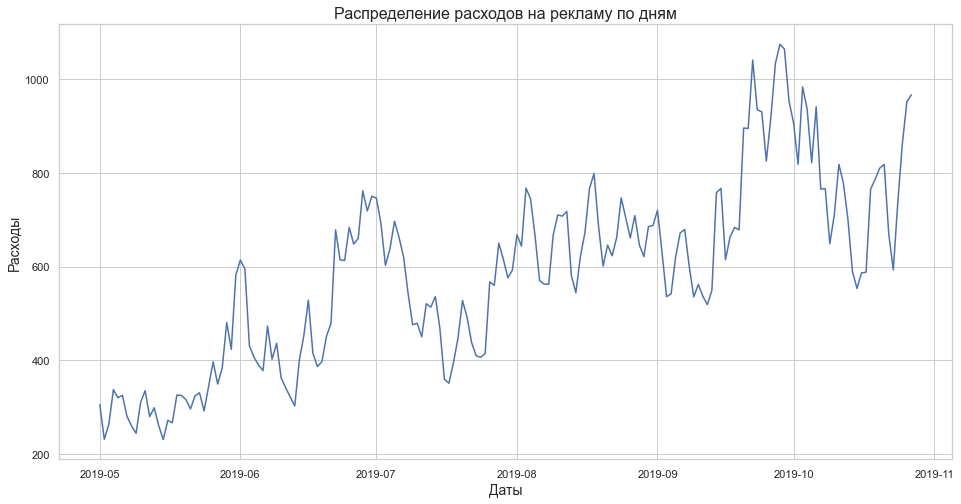

In [55]:
plt.rcParams['figure.figsize']=16,8
sns.set_style("whitegrid")
lineplot = sns.lineplot(data=date_spen.reset_index(), x='dt', y="costs")
lineplot.axes.set_title("Распределение расходов на рекламу по дням", fontsize=16)
lineplot.set_xlabel("Даты", fontsize=14)
lineplot.set_ylabel("Расходы", fontsize=14);


  Замечаем, что пики трат приходятся на начала каждого следующего месяца. Если увеличить масштаб и вывести отдельно месяц, например сентябрь, то можно заметить, что пики трат приходятся на выходные. В октябре в начале месяца немного "засуетились", а дальше картина аналогичная. Видимо маркетинговый отдел делает ставку на использование приложения именно в выходные, или привлекая пользователей в выходные, стремится получить их активность уже в течении недели. <br>
  А в начале месяца производят обновления, улучшения и прочее, поэтому дополнительно вкладываются в рекламу в том числе тех самых обновлений и улучшений.<br>
  Наибольшие траты были 28.09.19 - 1075, наименьшие 15.05.19 - 230.

### Расходы на рекламу по каналам

Для начала рассмотрим расходы на рекламу по каналам привлечения пользователей. Полагая, что какнал `Organic` не финансируется. <br> Запишем результаты в таблицу `channel_spen`

In [41]:
channel_spen = costs.groupby('channel').agg({'costs' : 'sum'}).sort_values('costs', ascending=False)
channel_spen

costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22

Рассчитаем процент затрат на каждый рекламный канал от общей суммы затрат на рекламу по проекту.

In [42]:
#channel_spen = channel_spen.reset_index()
channel_spen['per_costs'] = round(channel_spen['costs'] / overall_spen * 100, 2)
channel_spen

costs  per_costs
channel                                
TipTop              54751.30      51.90
FaceBoom            32445.60      30.75
WahooNetBanner       5151.00       4.88
AdNonSense           3911.25       3.71
OppleCreativeMedia   2151.25       2.04
RocketSuperAds       1833.00       1.74
LeapBob              1797.60       1.70
lambdaMediaAds       1557.60       1.48
MediaTornado          954.48       0.90
YRabbit               944.22       0.90

Готово. Видим, что более 50% рекалмного бюджета уходит на TipTop и около трети на FaceBoom. На финансирование остальных каналов потрачено 5%-1% от общей суммы.

Готово. В `channel_spen` столбец `costs` отсортирован по убыванию. Визуализируем данные.

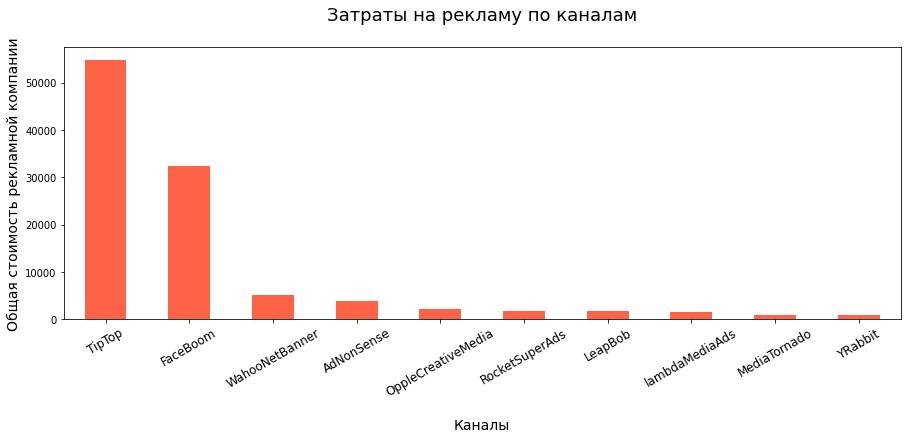

In [43]:
channel_spen.plot(y='costs', kind='bar', figsize=(15, 5), legend=False, color='tomato')

plt.title(label='Затраты на рекламу по каналам\n', fontsize=18)
plt.xlabel("\nКаналы", fontsize=14)
plt.ylabel("Общая стоимость рекламной компании", fontsize=14)
plt.xticks(rotation = 30, fontsize=12)
plt.show()

Наибольшая сумма средств была выделена на рекламу через каналы `TipTop` - 54751 и `FaceBoom` - 32445. Ранее мы отмечали, что и количество привлеченных пользователей по этим каналам, количество платящих пользователей тоже выше других каналов (финансируемых). Однако по доле платящих пользователей от числа привлеченных, `TipTop` уступает не только `FaceBoom`, но и AdNonSens, lambdaMediaAds финансирование которых обходится на порядок дешевле.

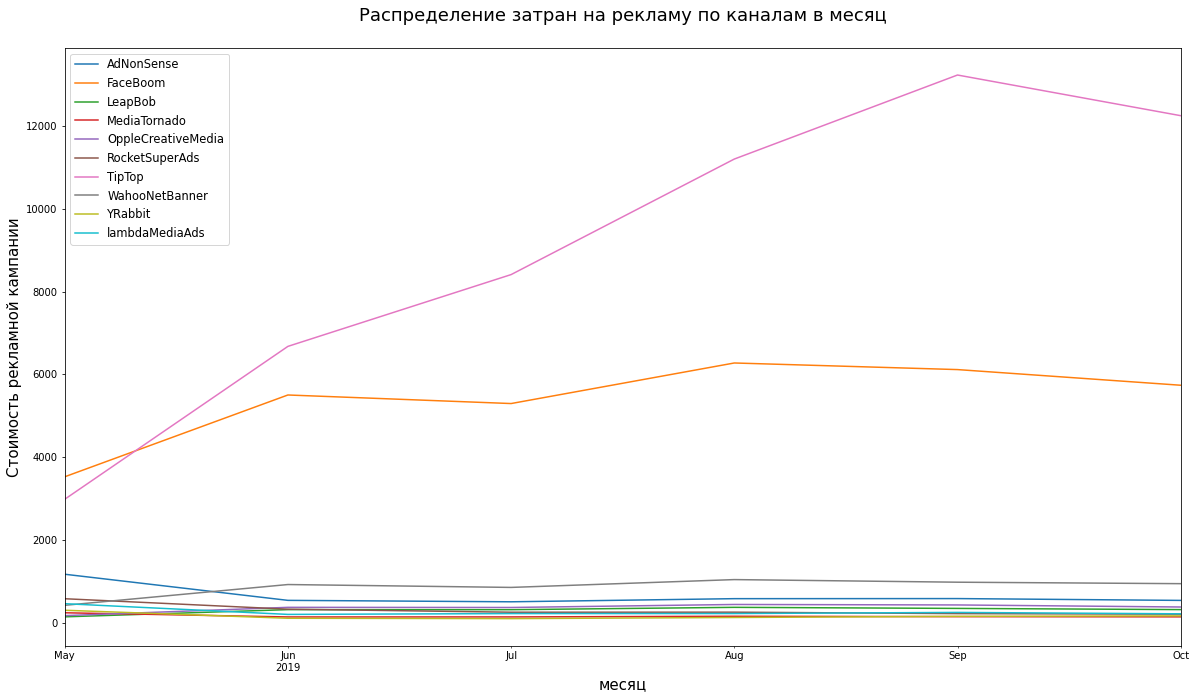

In [44]:
costs['month'] = costs['dt'].astype('datetime64[M]')
channel_spen_m = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')

channel_spen_m.plot(figsize=(20,11))
plt.legend(fontsize=11.5)
plt.title('Распределение затран на рекламу по каналам в месяц\n', fontsize=18)
plt.xlabel('месяц', fontsize=15)    
plt.ylabel('Стоимость рекламной кампании', fontsize=15)
plt.show()

Видим, что в рекламный канал `TipTop` месяц от месяца вливалось все больше и больше денег, и только лишь до первой трети мая, по этому показателю его обходил `FaceBoom`. Далее стабильное увеличение финансирования, которое в итоге вылилось более чем в двукратное превосходство над `TipTop` и в десятки раз больше по сравнению с остальными каналами. Видно что оснавная ставка делалась на него и `FaceBoom`.<br>
Про финансирование остальных каналов можно сказать, что с июня оно практически не менялось месяц от месяца.<br> Взгляним на них отдельно.

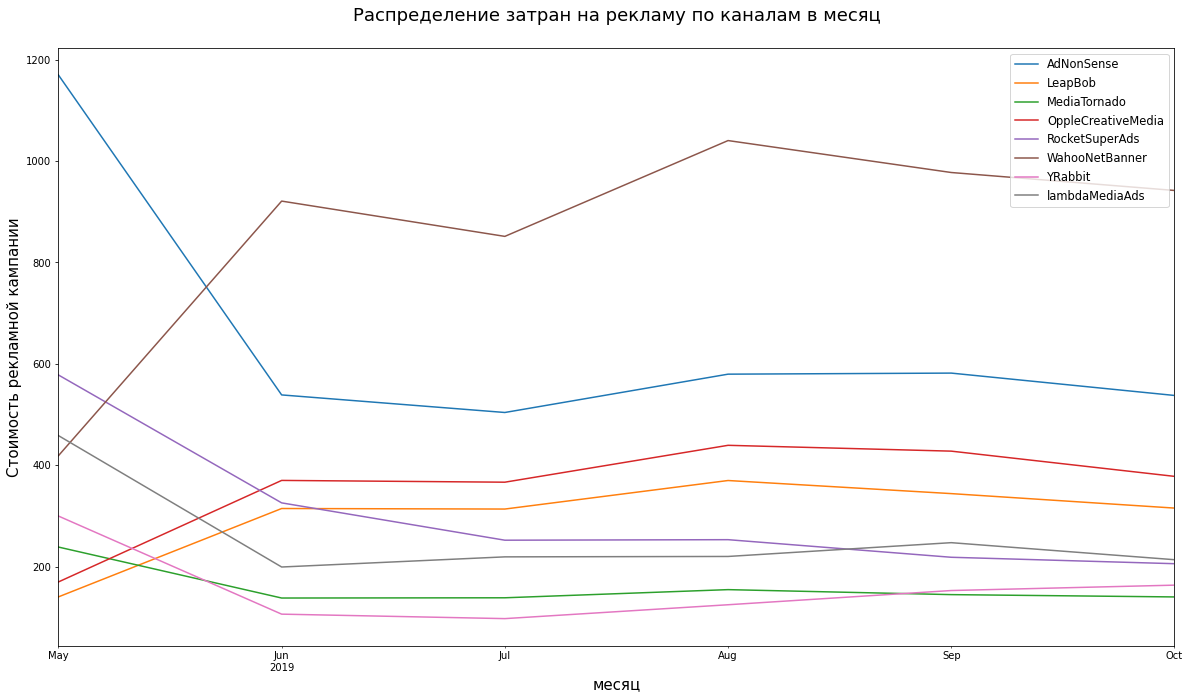

In [45]:
channel_drop = channel_spen_m.drop(['TipTop', 'FaceBoom'], axis=1)

channel_drop.plot(figsize=(20,11))
plt.legend(fontsize=11.5)
plt.title('Распределение затран на рекламу по каналам в месяц\n', fontsize=18)
plt.xlabel('месяц', fontsize=15)    
plt.ylabel('Стоимость рекламной кампании', fontsize=15)
plt.show()

Вот! Здесь мы видим, что финансирование остальных каналов не было стабильным. После старта в мае для каждого из каналов `AdNonSense`, `MediaTornado`, `RocketSuperAds`, `YRabbit`, `lambdaMediaAds` упало почти вдвое к июню, и уже не выходило на прежний уровень. В Июле можно отметить положительную динамику почти для всех каналов (ну или как минимум стабильность для `lambdaMediaAds` и `RocketSuperAds`).

Финансирование каналов `WahooNetBanner`, `OppleCreativeMedia`, `LeapBob` наоборот росло с мая по июнь, причем стартовав в мае со значения близкого к сренему для всех каналов, `WahooNetBanner` к июню обошел всех (многих в два и более раз) и далее этому каналу выделяли средства существенно больше остальных.

### Средняя стоимость привлечения одного пользователя

Таблица `profiles`, которая была получена ранее, содержит столбец  `acquisition_cost` c данными о стоимости привлечения. Найдем среднюю стоимость привлечения пользователя для всего проекта и по каналам. Исключим из расчета пользователей пришедших с канала organic. 

In [46]:
profiles = profiles.query('channel != "organic"')
profiles_c = profiles['acquisition_cost'] 

print('Медиана стоимости привлечения пользователя для всего канала:', 
      round(profiles['acquisition_cost'].median(), 2))
print('Мода стоимости привлечения пользователя для всего канала:', stat.mode(profiles['acquisition_cost']))
profiles_c.describe().apply("{0:.2f}".format)

Медиана стоимости привлечения пользователя для всего канала: 1.08
Мода стоимости привлечения пользователя для всего канала: 0.25


count    93569.00
mean         1.13
std          0.99
min          0.12
25%          0.26
50%          1.08
75%          1.13
max          3.72
Name: acquisition_cost, dtype: object

Заметим, что медиана почти в 3 раза меньше среднего. Значит данное распределение имеет положительную ассимметрию. А мода равна 0. Ведь как отмечалось ранее, наибольшее число пользователей пришли по каналу `Organic`, который не финансируется. 

Теперь рассчитаем средние стоимости привлечения пользователей по каналам привлечения.

In [47]:
mean_acq_channel = profiles[profiles['channel'] != 'organic'].groupby('channel').agg({'acquisition_cost' : 'mean'})
mean_acq_channel.sort_values('acquisition_cost', ascending=False)

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172

Каналы, которые привлекают больше всех платящих пользователей и самые дорогие по средней стоимости привлечения одного пользователя. `TipTop` - 2.80, `FaceBoom` - 1.11. Дешевле всех в среднем обходятся `YRabbit`, `MediaTornado`, `LeapBob` - около 0.2.

**ВЫВОДЫ**
* Общая сумма расходов на рекламу с 1 мая по 27 октября 2019 года составила 105497.3 у.е.
* Начиная с мая и по сентябрь сумма расходов на рекламу росла от месяца к месяцу. Май - июнь + 5112, июнь - июль + 1357, июль - август + 4210, август - сентябрь + 225. И лишь в сентябре - октябре снизилась на 1559;
* В ходе исследования отметили, что пики трат приходятся на начала каждого следующего месяца. А по дням внутри недели - на выходные. Наибольшая сумма расходов 28.09.19 - 1075, наименьшая 15.05.19 - 230.
* Наибольшая сумма средств была выделена на каналы TipTop - 54751 и FaceBoom - 32445. Далее сумма средств сразу в 6 раз меньше, канал WahooNetBanner - 5151, и так далее. Последние два канала в списке обошлись меньше 1000 каждый (MediaTornado - 954, YRabbit - 944).
* В разрезе исследуемого промежутка времени финансирование каналов не было стабильным. Отметили, что в рекламные каналы TipTop и FaceBoom вливалось все больше и больше денег. Что в итоге вылилось более чем в десятикратное превосходство над остальными каналами;
* Для каналов AdNonSense, MediaTornado, RocketSuperAds, YRabbit, lambdaMediaAds финансирование упало почти вдвое к июню, и уже не выходило на прежний уровень; 
* Финансирование каналов WahooNetBanner, OppleCreativeMedia, LeapBob наоборот росло с мая по июнь. WahooNetBanner к июню вышел на третье место по финансированию.
* Медиана стоимости привлечения одного пользователя во всем проекте - 1.08, мода - 0.25, среднее - 1.13;
* По каналам наибольшую стоимость привлечения одного пользователя имеют TipTop - 2.80, FaceBoom - 1.11, AdNonSense - 1.00. Примерно 0.2 стоит привлечь пользователя через каналы YRabbit, MediaTornado, LeapBob.

## Окупаемость рекламы

Используя графики LTV, ROI и CAC проанализируем окупаемость рекламы, взяв за момент анализа 1 ноября 2019 года, а горизонт анализа - 14 дней. Пользователей, привлеченных через канал `Organic`, исключим из исследования, так как нас интересует окупаемость рекламных компаний. Однако доход, который они приносят мы можем учитывать, как дополнительный фактор.

In [48]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

### Общая окупаемость рекламы

Рассчитаем пожизненную ценность, возврат на инфестиции и их динамики с моментом анализа 1 октября 2019 года и горизонтом в 14 дней. Построим соответствующие графики.

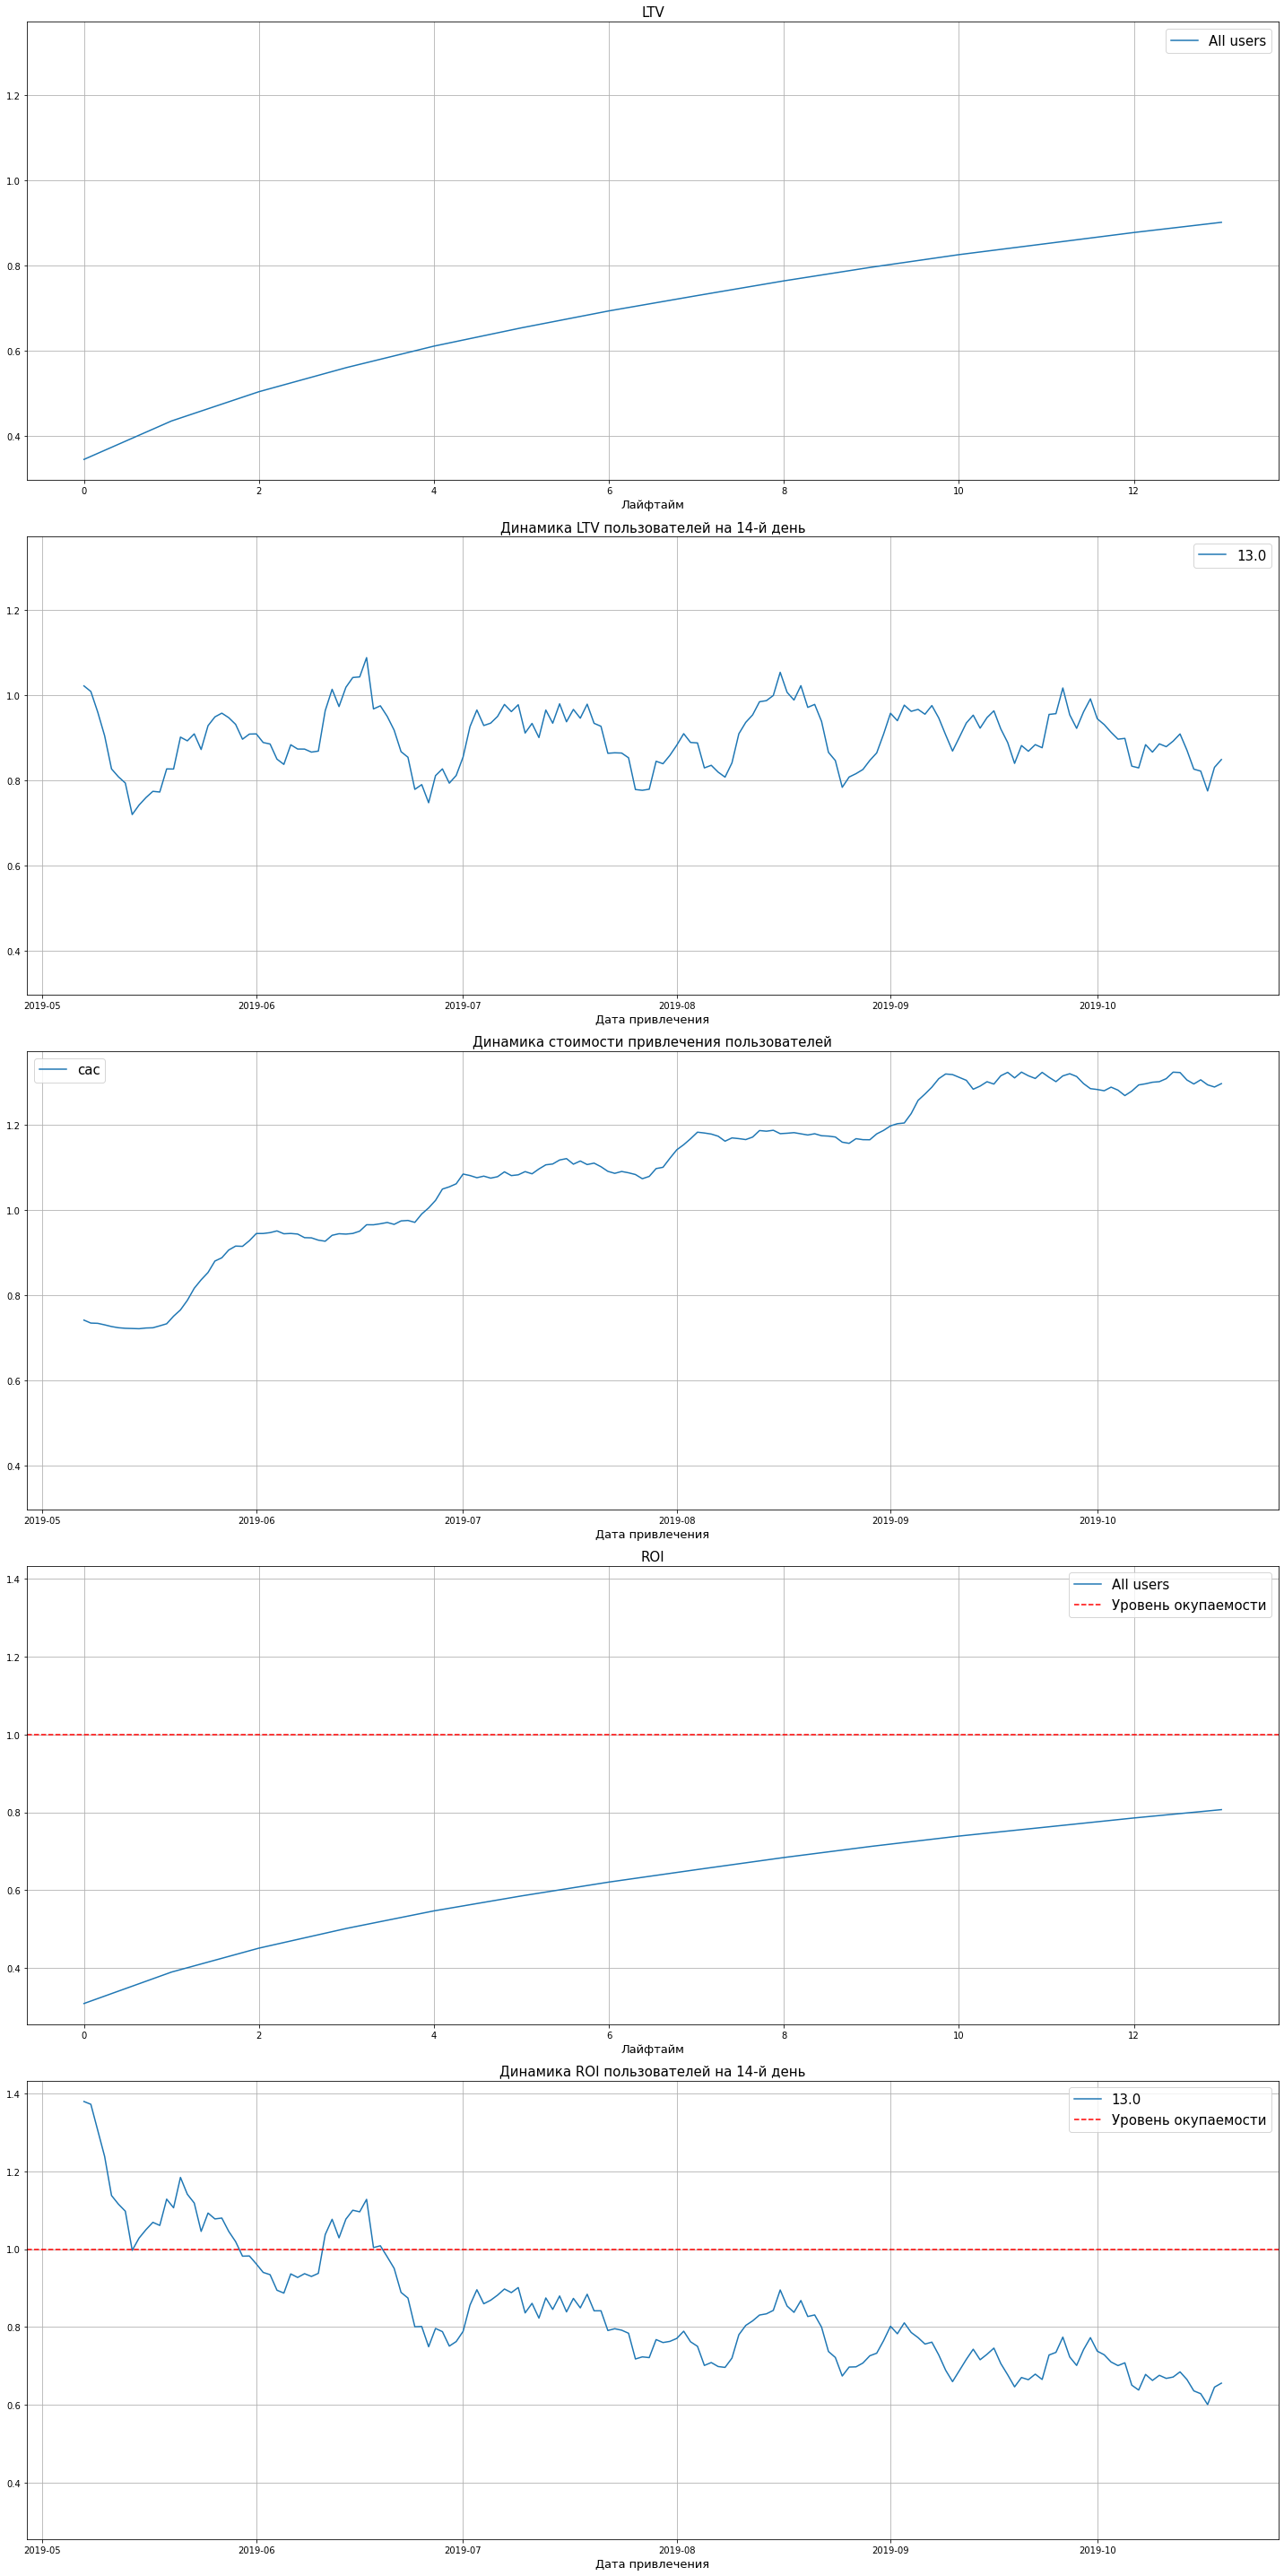

In [49]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv_roi(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Пожизненная ценность пользователей предсказемое возрастает. Динамика LTV достаточно стабильна и колеблется в пределах 70% - 110%.

А вот САС непрерывно растет, с от 70% до 125% к концу октября.
Из графика ROI видим, что значения в промежутке 20% - 80%. Порог окупаемости на 14 день не преодолевается.

По динамике графика возврата на инвестиции видим, что для пользователей привлеченных в начале мая это показатель был в интервале от 100% до почти 140%, и к началу июня уже перестал преодолевать порог в 100%. 

В целом можно сказать, что **реклама не окупается**. А вот по графику динамики ROI видим, что затраты на рекламу пользователей, привлеченных до июня еще как-то превышали порог окупаемости

### Окупаемость рекламы с разбивкой по рекламным каналам

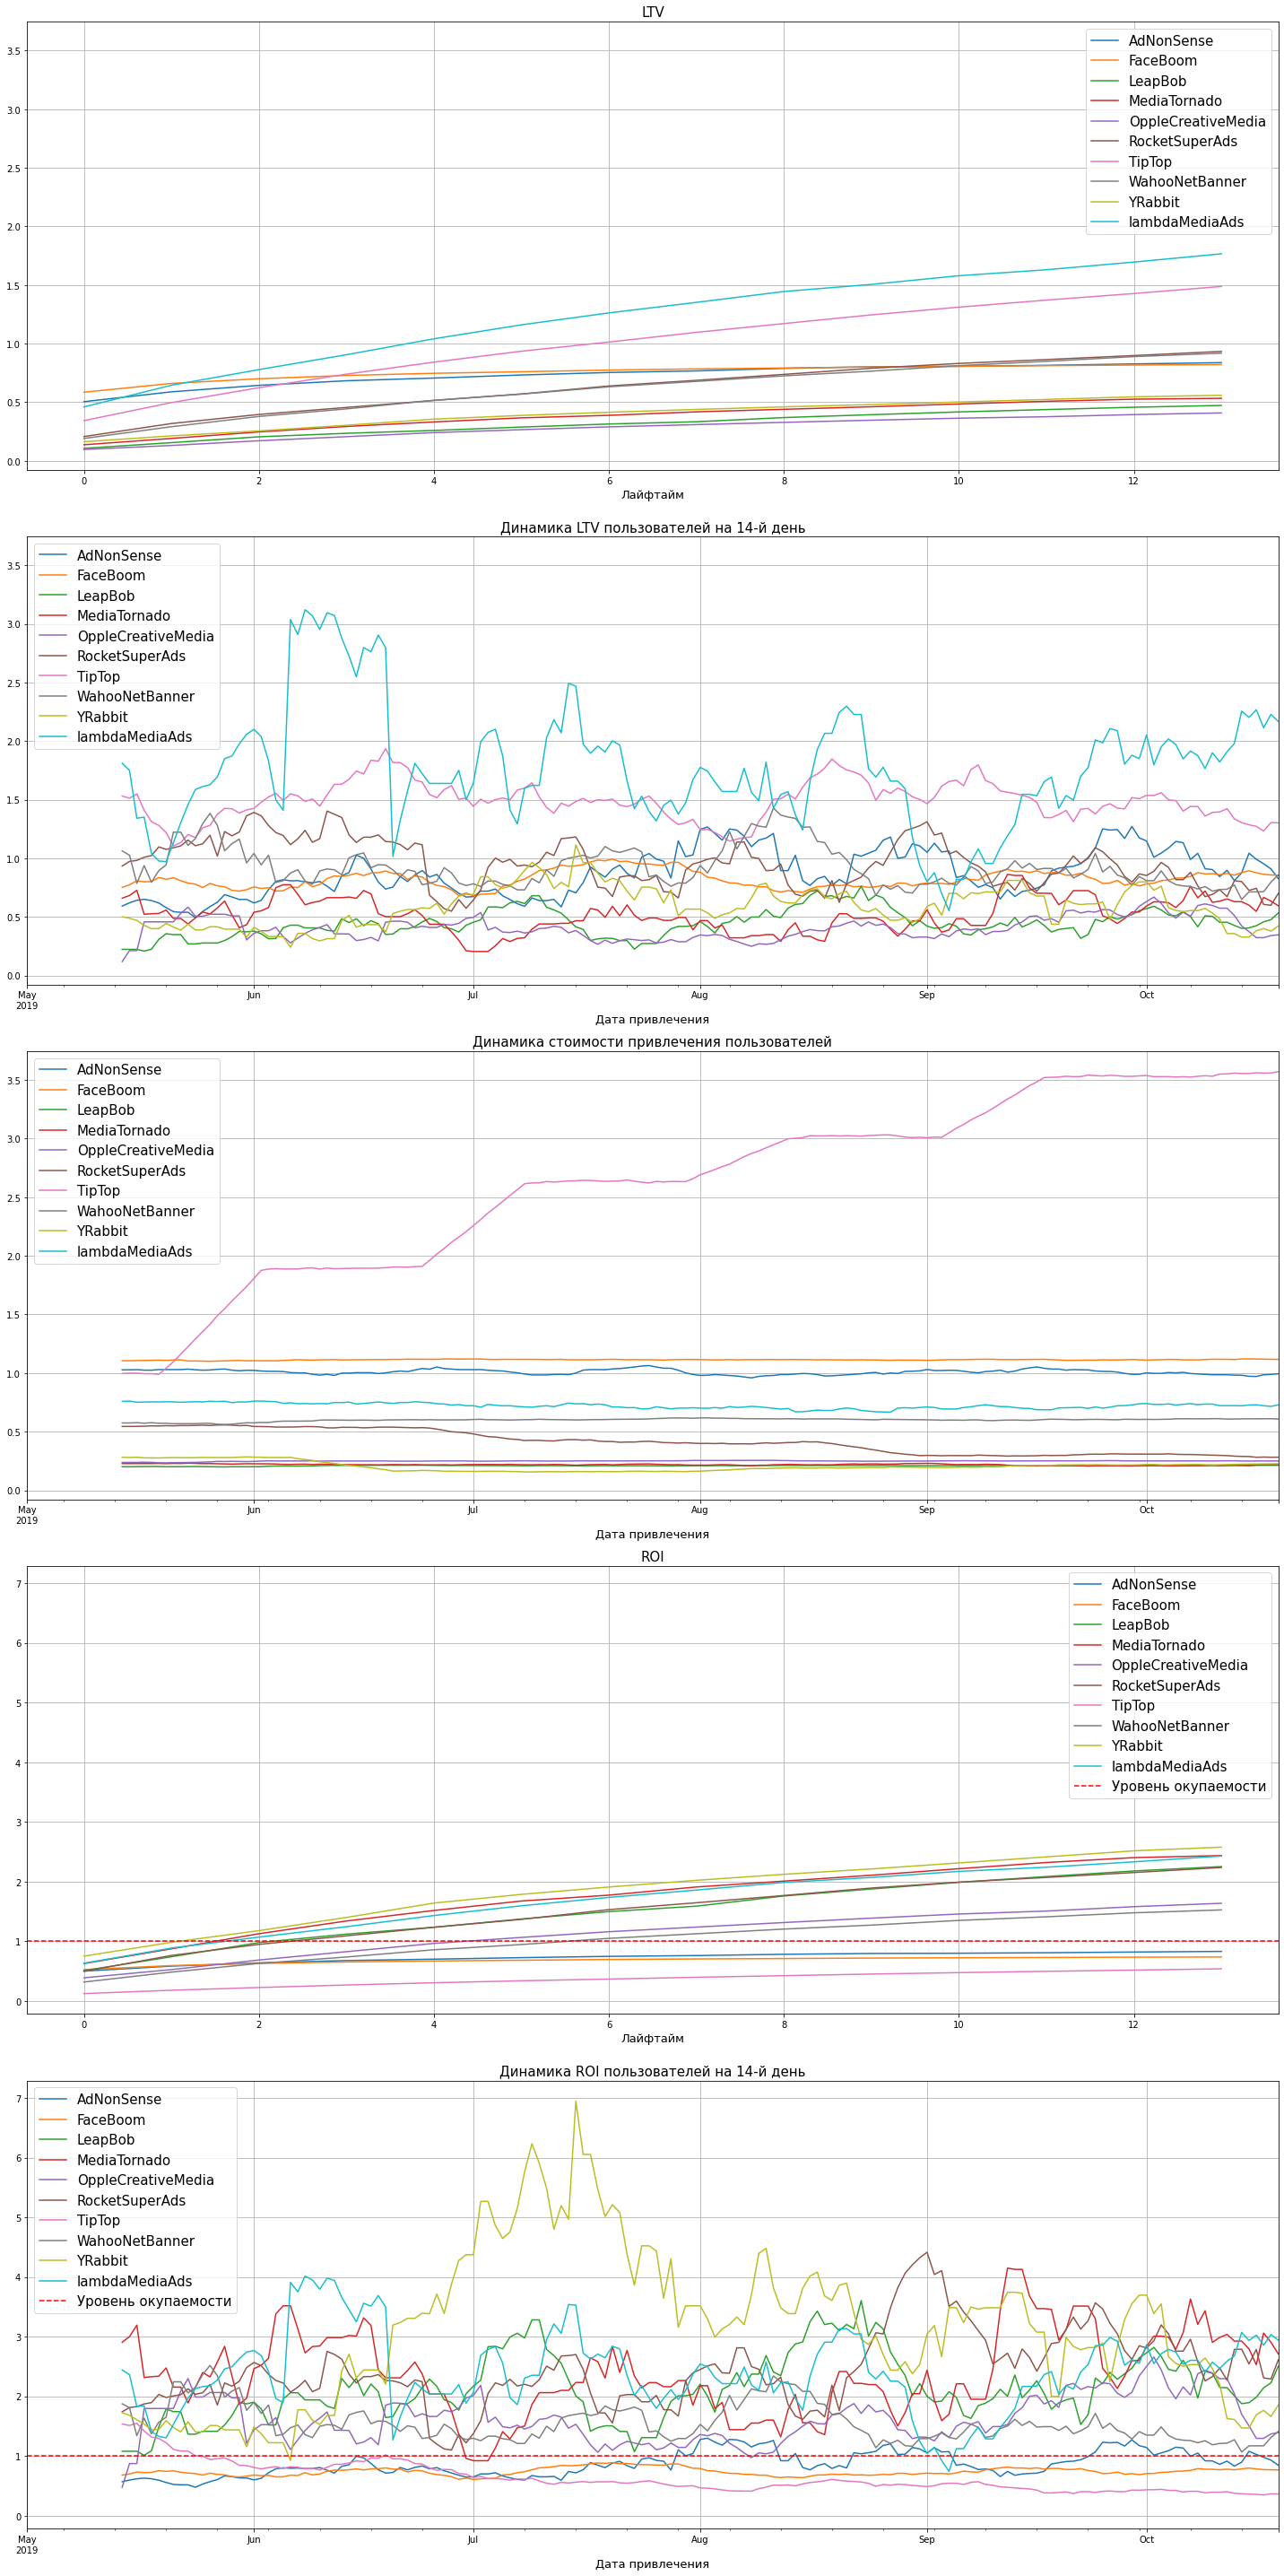

In [50]:
# смотрим окупаемость с разбивкой по рекламным каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv_roi(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Замечаем, что пожизненная ценность клиентов пришедших с каналов lambdaMediaAds и TipTop выше остальных, на третьем месте идет FaceBoom до 8 дня, далее его обгоняют WahooNetBanner и RocketSuperAds. В динамике замечаем, что пожизненная ценность пользователей, пришедших с канала lambdaMediaAds, менее стабильна в сравнении с остальными, и несколько проседает для пользователей пришедших в конце августа, но все достаточно предстазуемо. Остальные каналы так и вовсе показывают завидную стабильность.

Динамика стоимости привлечения показывает стабильность для всех каналов кроме двух. Первый - TipTop. С середины мая по июнь - почти двукратный рост, с конца июня по середину июля - рост в 1.25 раза примерно, с начала августа по середину августа - рост в 1.15 раз примерно и с начала сентября до середины сентября рост в 1.17 раз примерно. Вообще с мая по октябрь стоимость привлечения пользователя выросла почти в 3.5 раза!  И привосходит аналогичный показатель на других каналах к середине сентября от 3.5 до 11 раз!

А вот теперь и самое интересное. ROI! За 14 дней TipTop не окупается! К 14 дню имея около 80%. Вместе с ним не проходят порог окупаемости FaceBom и AdNonSense. В течении двух дней окупаются каналы YRabbit,lambdaMediaAds и MediaTornado. В течении 4 дней - LeapBob и RocketSuperAds. А за 5 дней - WahooNetBanner, OppleCreativeMedia.

В динамике ROI видим, что пользователи пришедшие с TipTop в самом начале мая еще окупались, но после середины мая уже нет. Аналогично для AdNonSense и пользователей привлеченных во второй половине июля и в середине августа. Окупаемость была, но совсем небольшая и непродолжительная. Лучше остальных с точки зрения окупаемости выглядит канал YRabbit.

### Окупаемость рекламы с разбивкой по странам

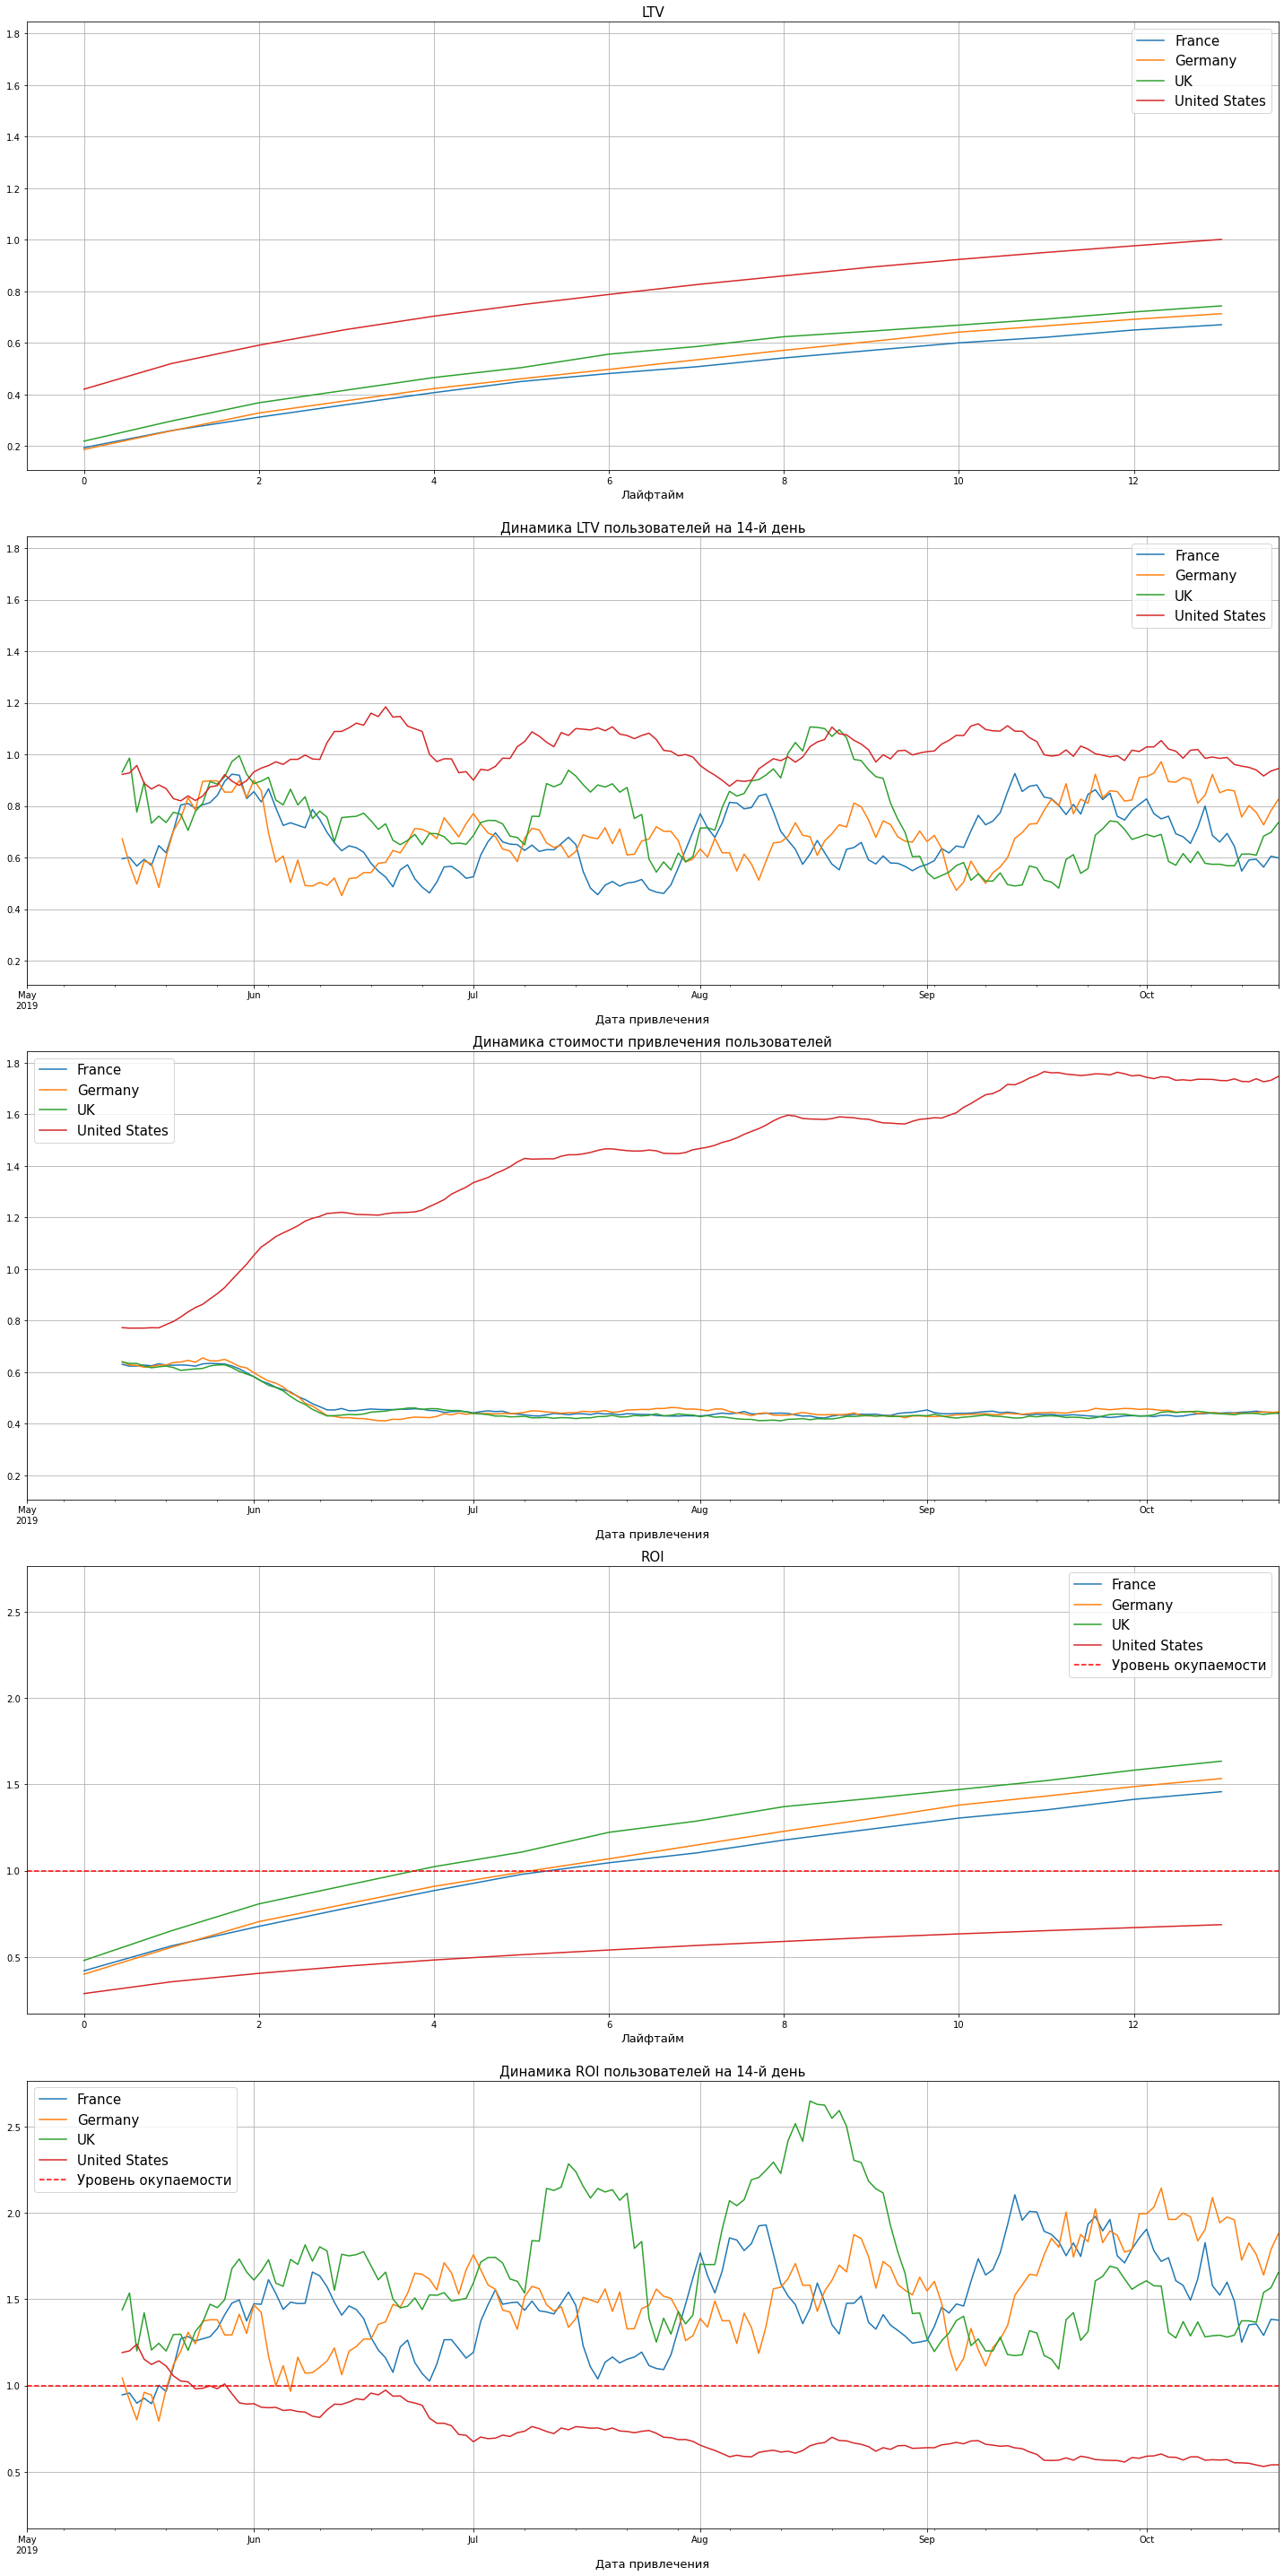

In [51]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv_roi(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Наибольшую пожизненную ценность имеют пользователи из США, далее Великобритании, Германии и Франции. 

Динамика LTV достаточно стабильна.

А вот в динамике стоимости привлечения пользователей, стоимость привлечения пользователя из США "улетела" далеко вверх. Превысив начальное значение примерно в два раза, и более чем в 3 раза превышая соответствующие значения по другим странам. Стоимость рекламы которых, надо заметить, снизилась почти в полтора раза в сравнении с начальным показателем

И тут же видим, на графике ROI, что рекламная компания для пользователей из США не окупилась, максимум выйдя на показатель 80%-90%. Тогла как для Великобритании окупилась за четыре дня, и перешла к 14 дню показатель 160%. Для Германии и Франции возврат на инвестиции подошел к отметке в 150% на 14 день, а сама реклама окупилась за 6 дней.

На графике динамики ROI видим, что не все так плохо было для пользователей из США. Для пользователей привлеченных  до конца мая этот показатель был больше 100%, постепенно снижаясь с отметки 120%.



Рассмотрим окупаемость рекламы в США с разбивкой по каналам.

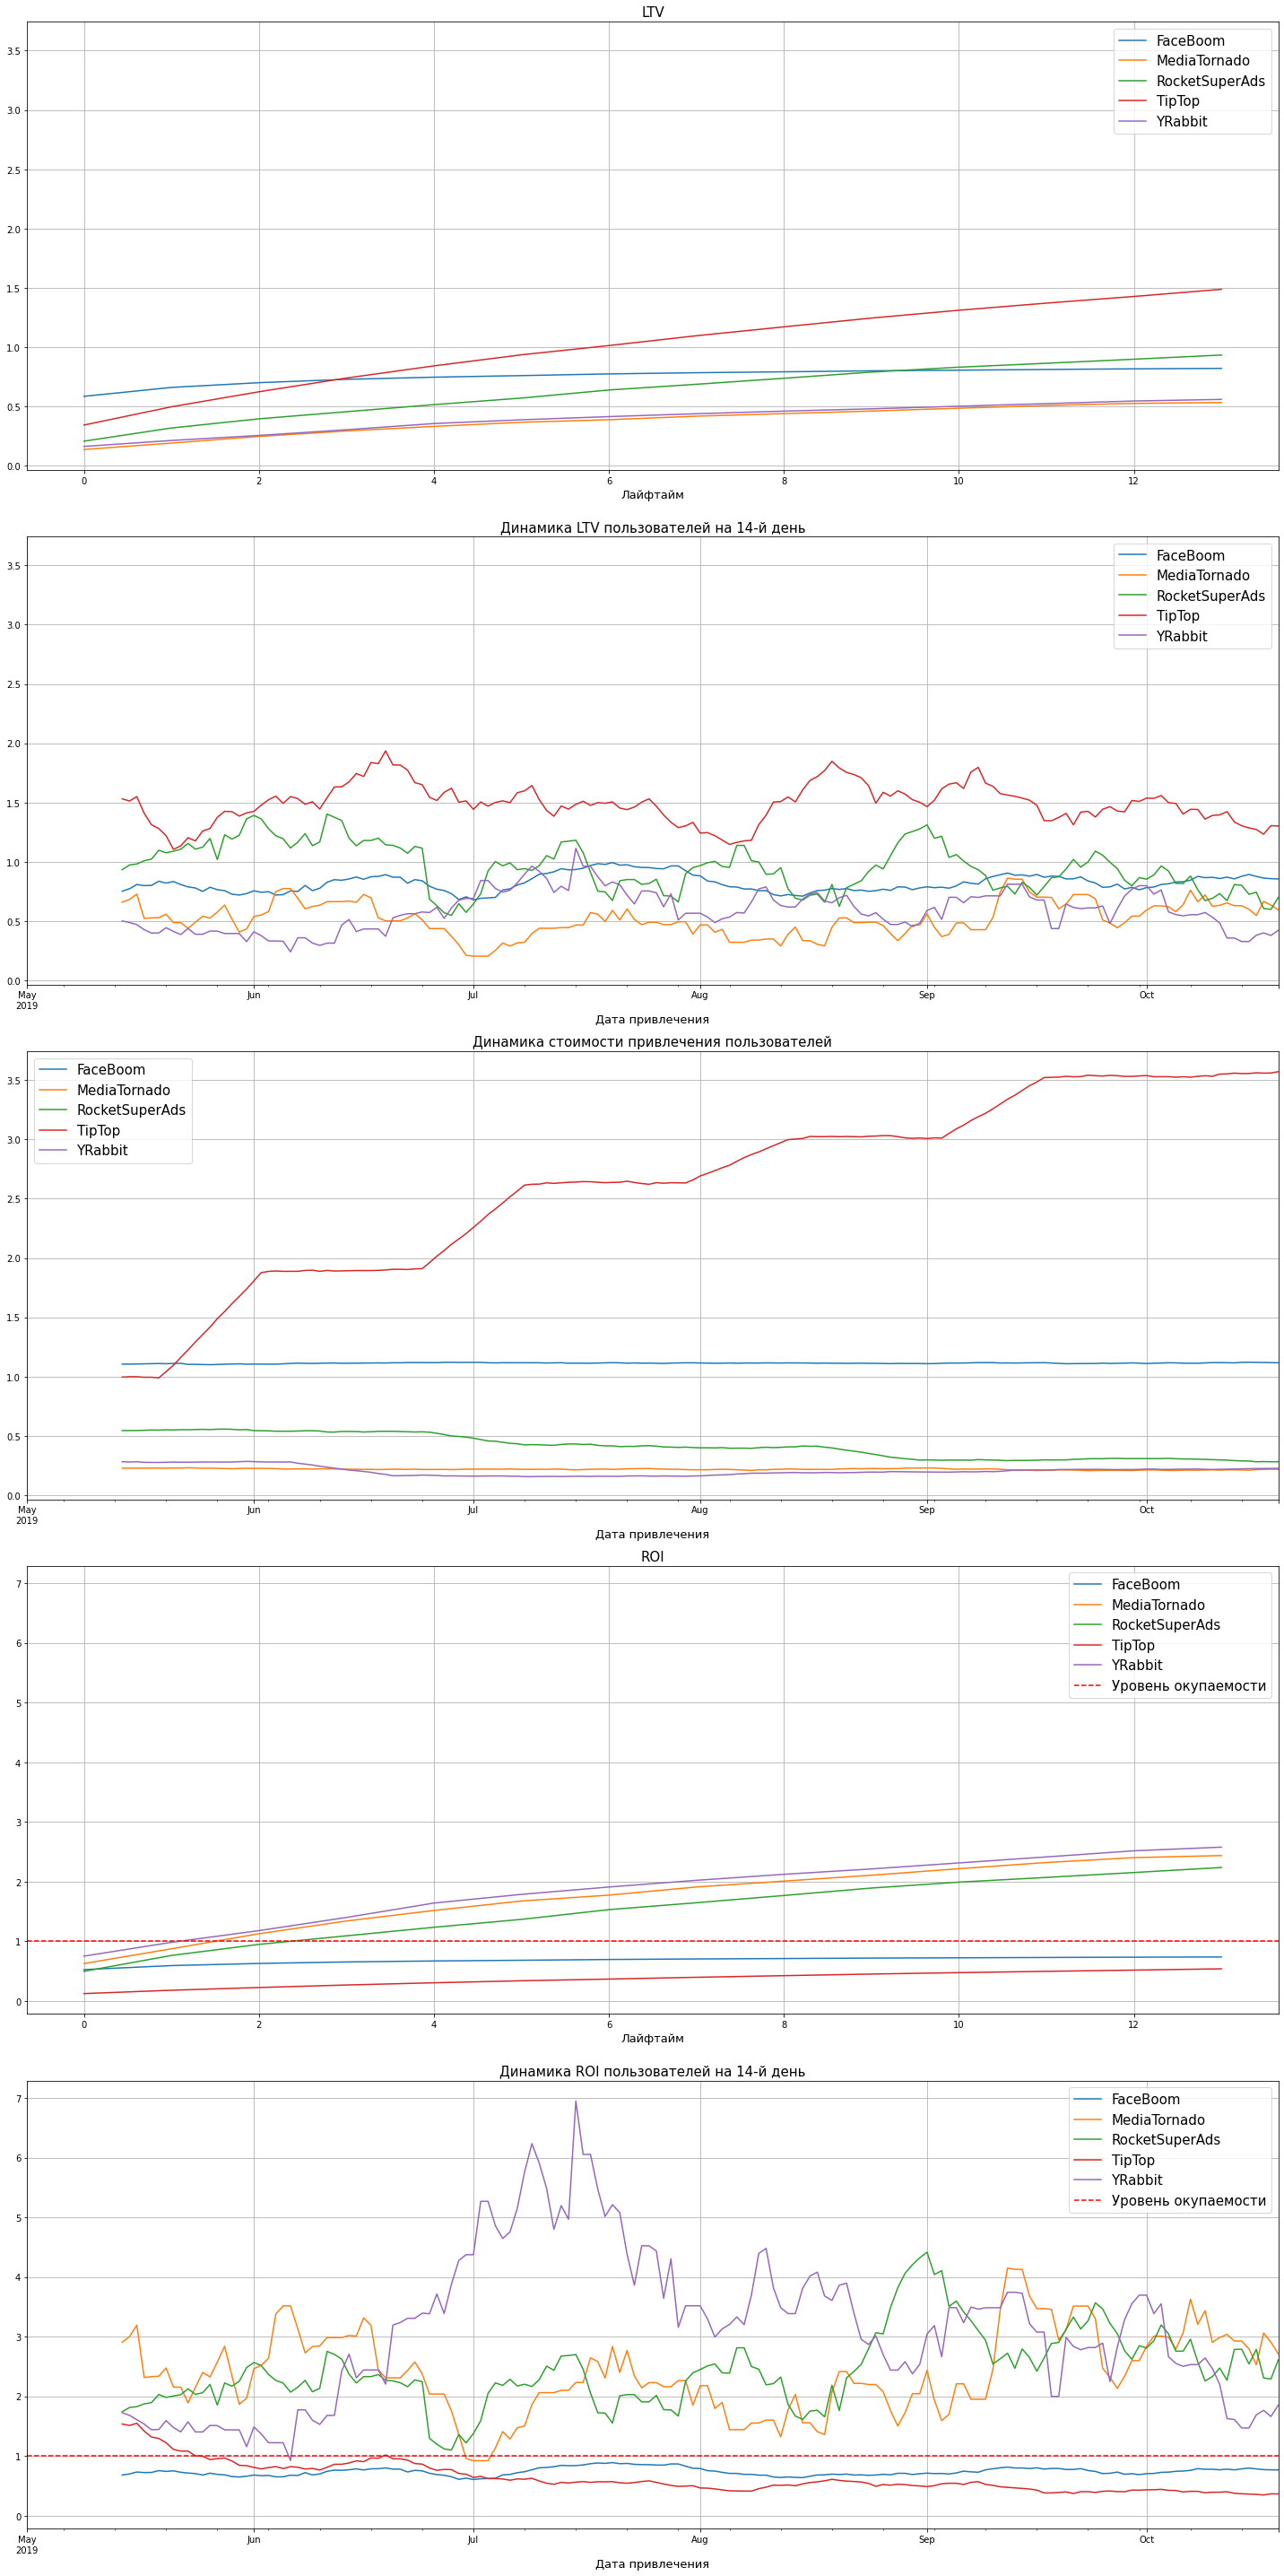

In [52]:
profiles_USA = profiles.query('region == "United States"')

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv_roi(
    profiles_USA, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 


Очень не плохо себя показывают каналы YRabbit, MediaTornado и RocketSuperAds. Первые два окупаются за 2 дня, третий за 4. Хорошие показатели динамики ROI. И все это при низких показателях стоимости привлечения пользователей. Т.е. например на канале RocketSuperAds стоимость привлечения снизилась к сентябрю, а окупаемость пользователей привлеченных к началу сентября возрасла.

Рассмотрим аналогичные метрики по Европе.

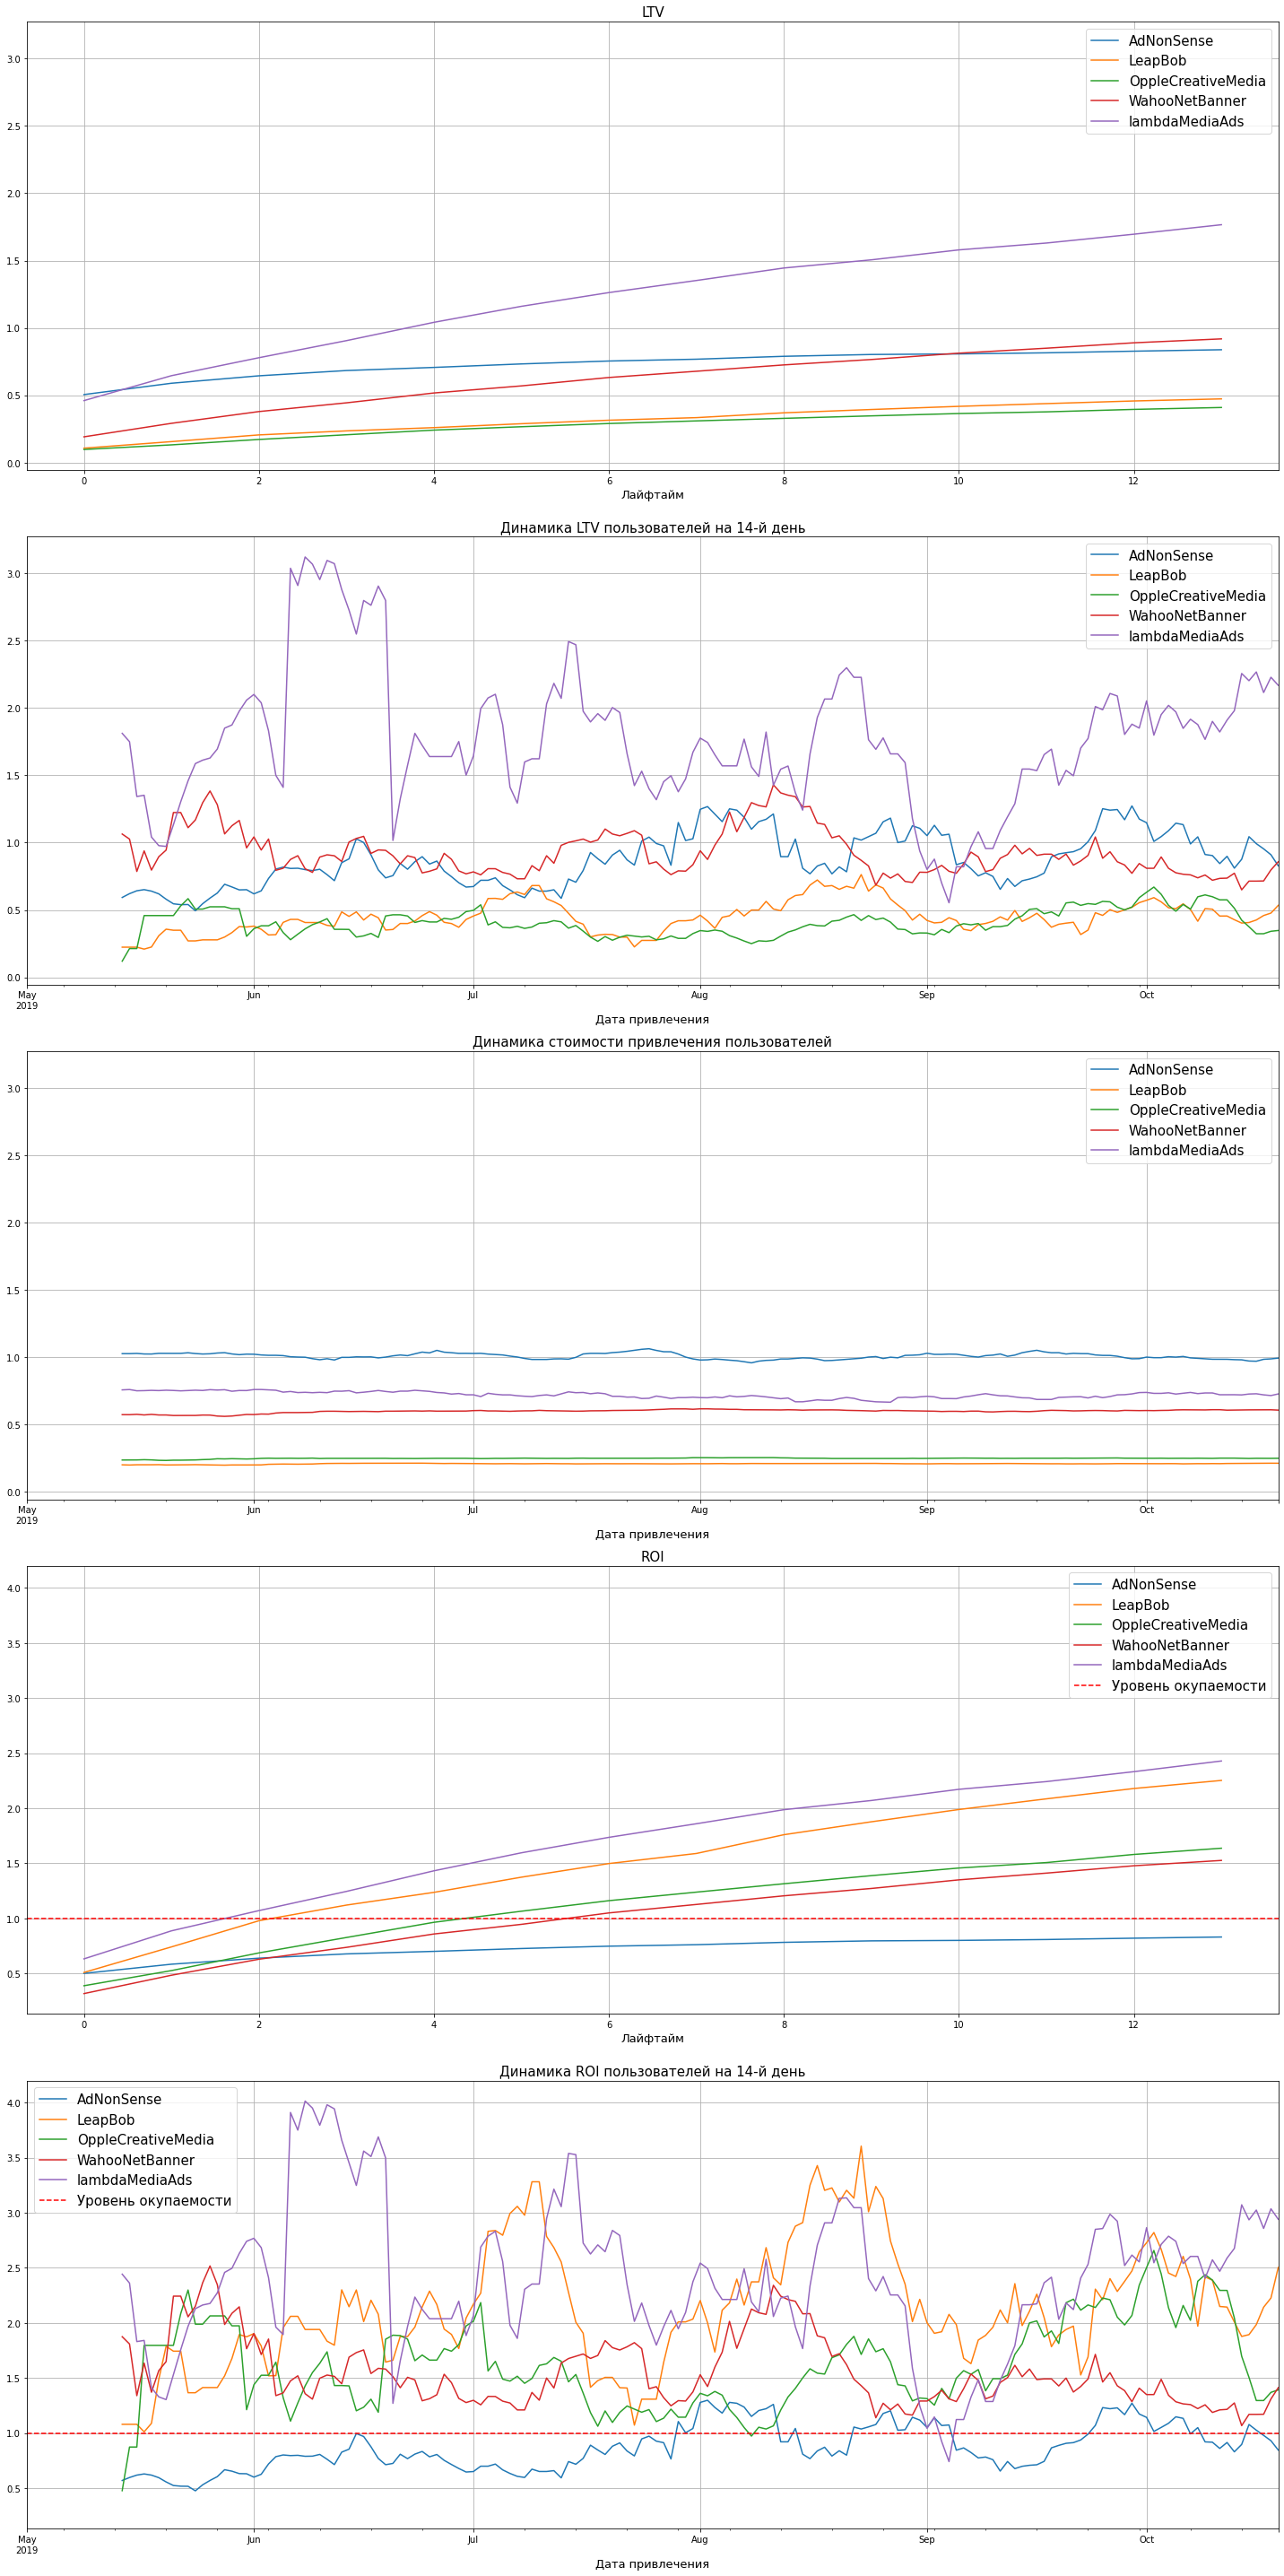

In [53]:
profiles_EURO = profiles.query('region != "United States"')

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv_roi(
    profiles_EURO, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Обращает на себя внимание канал lambdaMediaAds. Наилучшие показатели пожизненной ценности, окупаемость в течении двух дней с хорошими показателями в 250% к 14 дню. Также канал LeapBob с самой низкой стоимостью привлечения пользователей, окупаемостью в течении 2 дней и показателем ROI в 225% к 14 дню.

### Окупаемость рекламы с разбивкой по устройствам

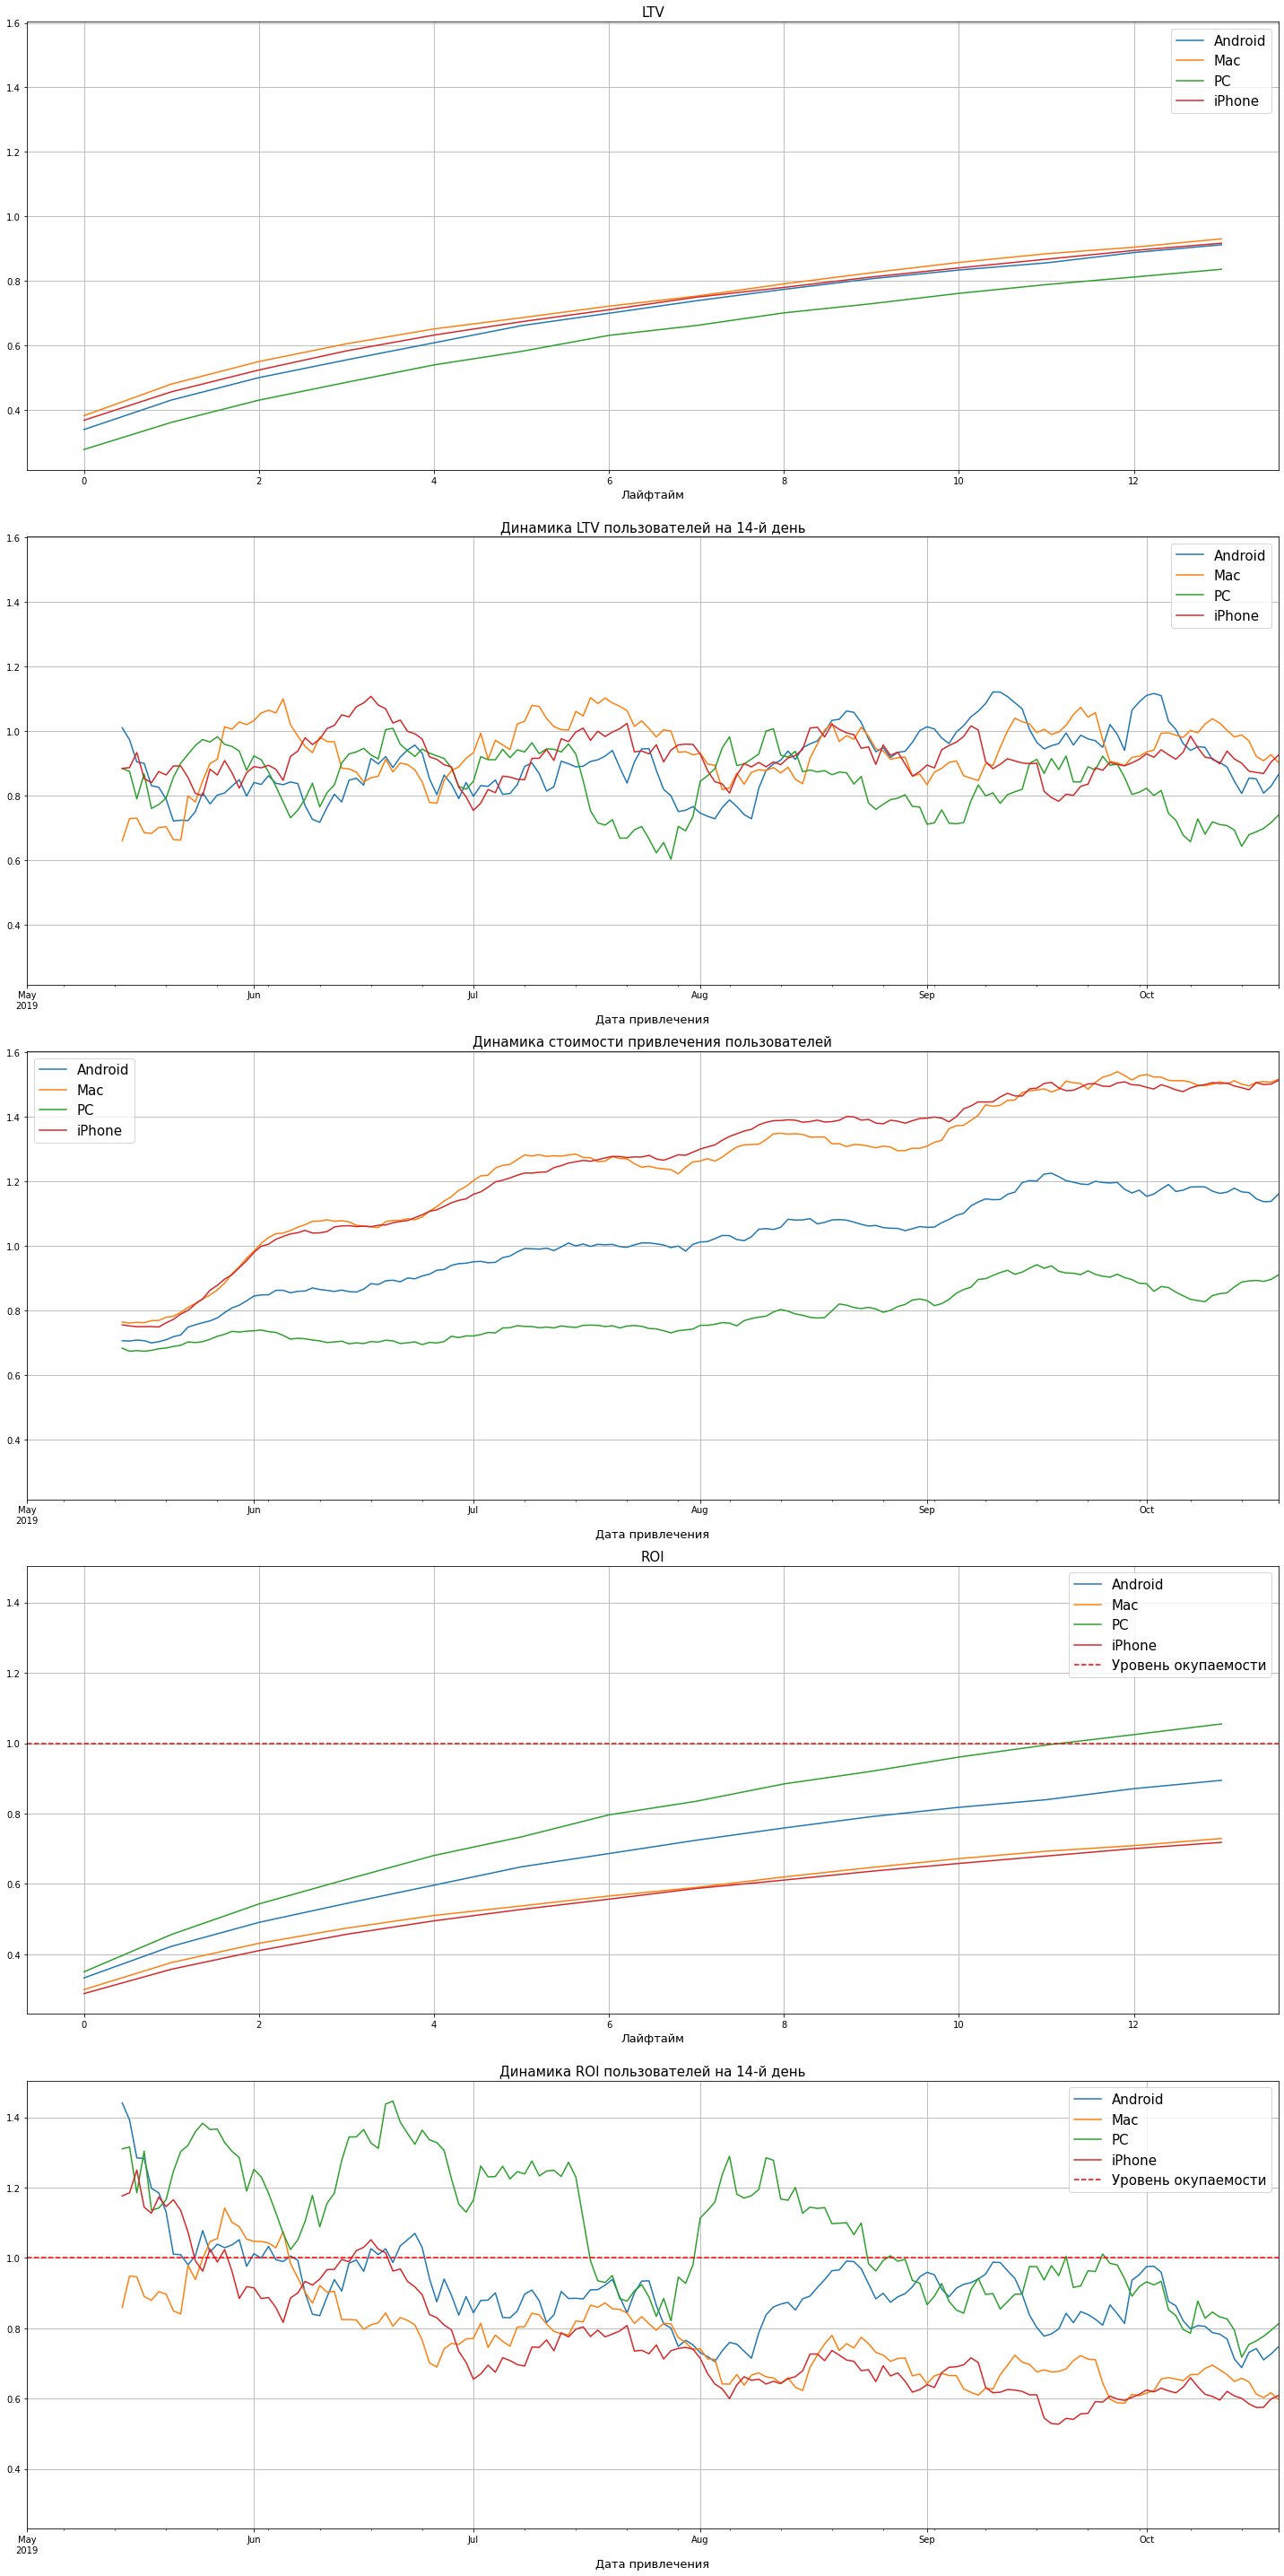

In [54]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv_roi(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Отметим, что в отличие от разбивки по каналам и странам, на графике LTV в разбивке по устройства, пожизненная ценность всех четырех устройств практически одинаковая. С некоторым преимуществом Mac и iPhone, и небольшим отстованием Android и PC. Динамика LTV тоже достаточна стабильна и близка у всех устройств. 

На графике динамики стоимости привлечения пользователей видим, что пользователи PC и Android обходятся дешевле других (разница между ними к середине исследуемого периода чуть менее 1.5 раз). Дороже остальных Mac и iPhone, которые между собой практически не отличаются, и превосходят Android тоже примерно в 1.5 раза.

Учитывая предыдущий абзац, заметим, что на графике ROI видно как неокупается iPhone, Mac и Android. В то время как PC окупается в течении 12 дней.

Также отметим, по графику динамики ROI, что пользователи iPhone и Android привлеченные в начале мая окупались. B в целом заметна общая тенденция снижения окупаемости. 



**ВЫВОДЫ**<br>
Относительно окупаемости рекламы можно сделать следующие замечания:
* В целом реклама окупается на 12 день, и далее выходит на показатель не более 105%;
* Пользователи привлеченные в середине июля не окупаются на 14 день;
* Стоимость привлечения пользователя с начала мая к середине сентября выросла почти в 3 раза.

В разбивке по каналам:
* Наилучшие показатели LTV у lambdaMediaAds и TipTop, наихудшие - OppleCreativMedia;
* Стоимость привлечения пользователей канала TipTop с мая по октябрь выросла почти в 3.5 раза! И превосходит аналогичный показатель на других каналах к середине сентября от 3.5 до 11 раз!
* За 14 дней TipTop не окупается! К 14 дню имея около 80%. Вместе с ним не проходят порог окупаемости FaceBom и AdNonSense. В течении двух дней окупаются каналы YRabbit,lambdaMediaAds и MediaTornado. В течение 4 дней - LeapBob и RocketSuperAds. А за 5 дней - WahooNetBanner, OppleCreativeMedia.

В разбивке по странам:
* Наибольшую пожизненную ценность имеют пользователи из США, далее Великобритании, Германии и Франции. 
* В динамике стоимость привлечения пользователя из США "улетела" далеко вверх. Превысив начальное значение примерно в два раза, и более чем в 3 раза превышая соответствующие значения по другим странам. Стоимость рекламы которых, надо заметить, снизилась почти в полтора раза в сравнении с начальным показателем
* Рекламная компания для пользователей из США не окупилась, максимум выйдя на показатель 80%-90%. 
* Рекламная компания для Великобритании окупилась за четыре дня, и перешла к 14 дню показатель 160%. Для Германии и Франции возврат на инвестиции подошел к отметке в 150% на 14 день, а сама реклама окупилась за 6 дней.
* Для пользователей привлеченных до конца мая ROI был больше 100%, постепенно снижаясь с начала мая с отметки 120%.

В разбивке по устройствам:
* Пожизненная ценность всех трех устройств практически одинаковая за небольшим преимуществом Mac и iPhone;
* Привлечение пользователей PC и Android обходятся дешевле чем Mac и iPhone;
* Рекламная компания по привлечению пользователей iPhone, Mac и Android не окупается. В то время как PC окупается в течении 12 дней;
* В целом, в динамике заметно снижение окупаемости рекламы по привлечению пользователей.


### Конверсия и удержание с разбивкой по устройствам, странам и рекламным каналам.

Используя ранее прописанные функции, построим графики конверсии и удержания с разбивкой по устройствам, странам и рекламным каналам. Проанализируем полученную визализацию указанных метрик, сделаем выводы о том, с каких устройств, стран и каналов пользователи лучше конвертируются в покупателей, и дольше остаются пользователями приложения.

#### Конверсия и удержание с разбивкой по устройствам

Найдем конверсию и удержание с разбивкой по **устройствам**, визуализируем при помощи ранее подготовленных функций *plot_conversion( )* и *plot_retention( )*. Проанализируем полученные результаты. 

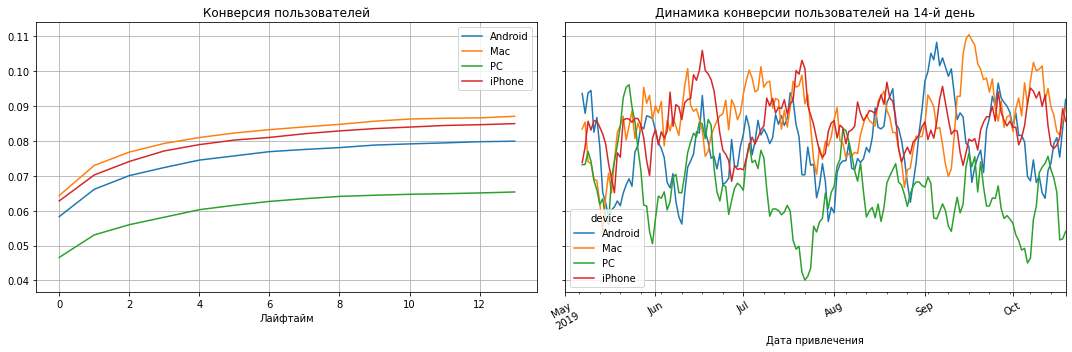

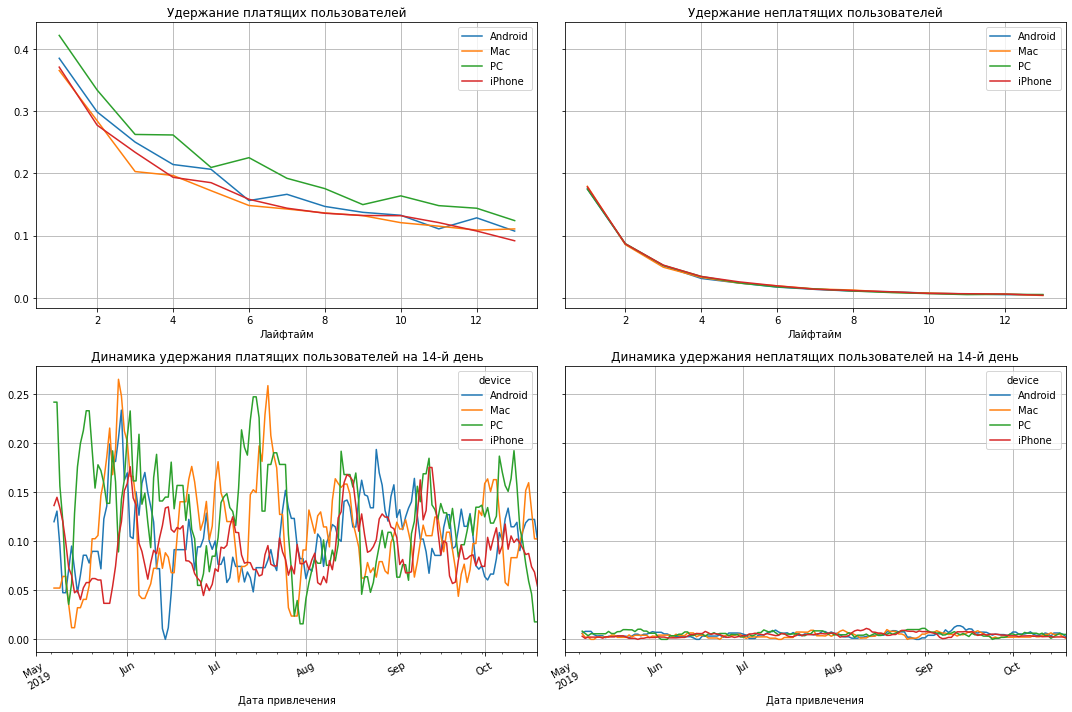

In [55]:
# конверсия по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device'])

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=7)

# удержание по устройствам
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device'])

plot_retention(retention, retention_history, horizon_days, window=7)

Лучше всего конвертируются пользователи Mac, iPhone и Android,  и примерно в два раза хуже пользователи PC. Однако среди  пользователей PC, при указанном горизонте исследования в 14 дней, стабильно больше тех, кто продолжает пользоваться приложение снова и снова. Худшие по показателю удержания пользователи Mac и iPhone. 

#### Конверсия и удержание с разбивкой по странам

Найдем конверсию и удержание с разбивкой по **странам**, визуализируем при помощи ранее подготовленных функций *plot_conversion( ) и plot_retention( )*. Проанализируем полученные результаты.

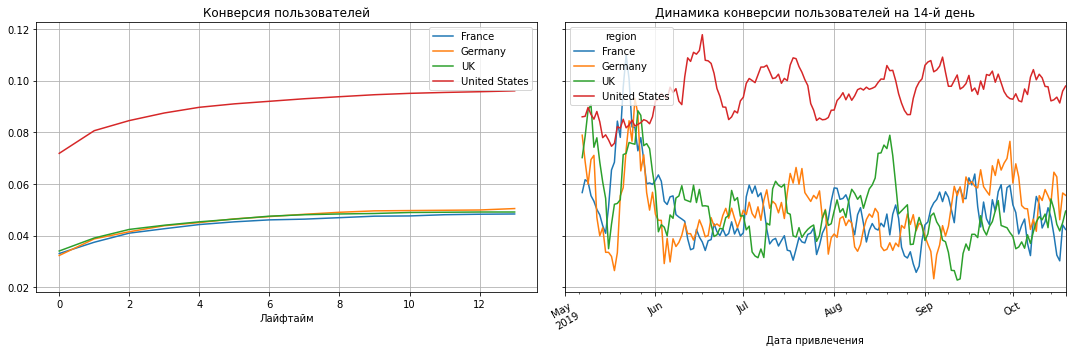

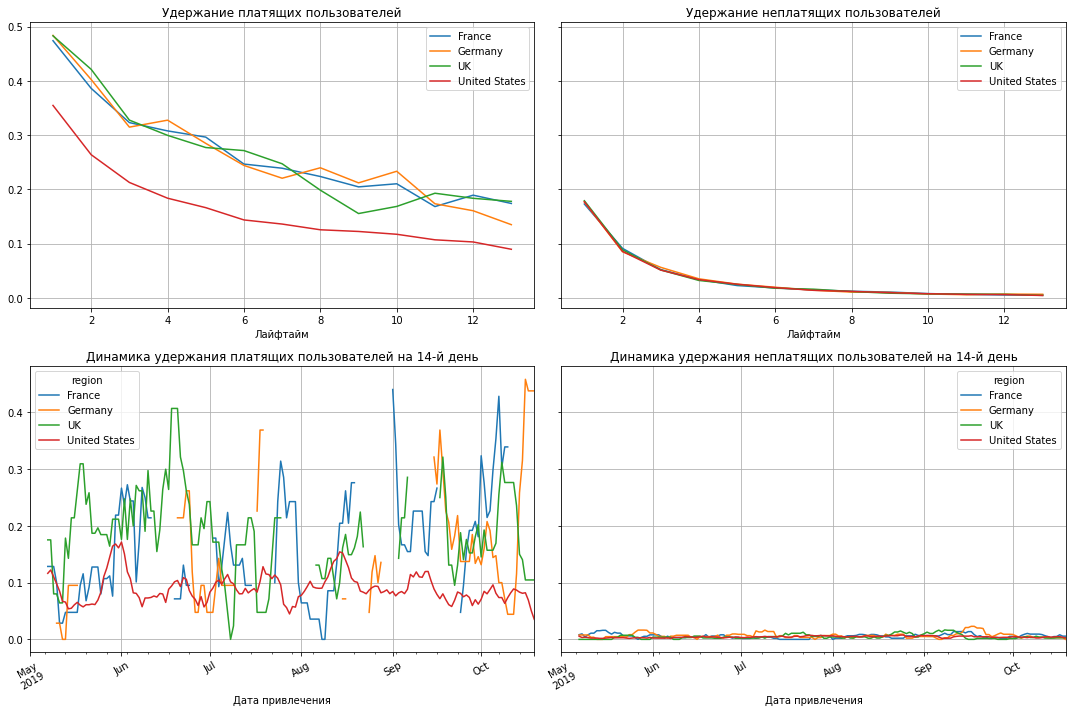

In [56]:
# конверсия по странам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region'])

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=7)

# удержание по странам
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region'])

plot_retention(retention, retention_history, horizon_days, window=7)

По странам конверсия пользователей США почти вдвое опережает остальные страны. Худший показатель у Франции. А вот с удержанием снова обратная картина - пользователи из США заметно меньше остальных продолжают пользоваться приложением, осуществляя покупки при этом. Т.е. имеют почти в два раза меньше повторых покупок, чем пользователи из других стран.

#### Конверсия и удержание по рекламным каналам 

Найдем конверсию и удержание с разбивкой по **рекламным каналам**, визуализируем при помощи ранее подготовленных функций *plot_conversion( ) и plot_retention( )*. Проанализируем полученные результаты.

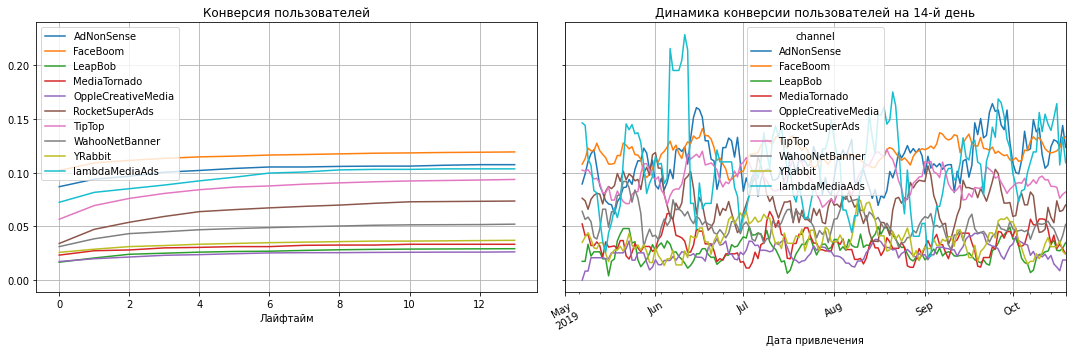

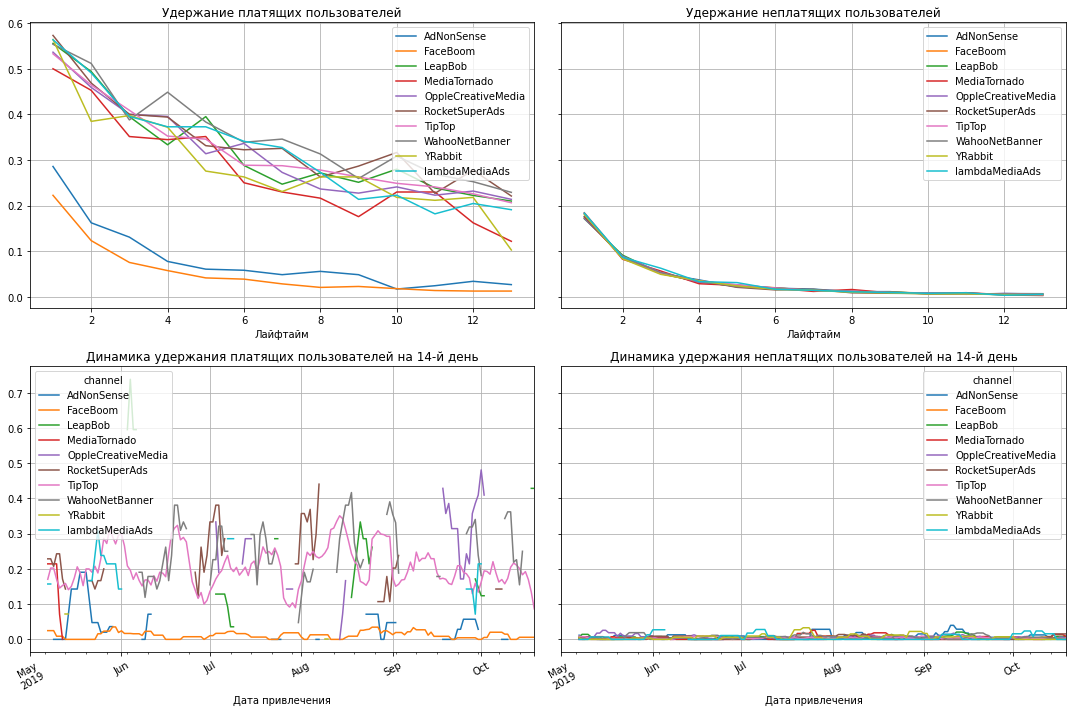

In [57]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=7)

retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel'])


plot_retention(retention, retention_history, horizon_days, window=7)


Конверсию по каналам можно разбить на несколько групп. Лидер - FaceBoom, далее с немного разным уровнем на старте, но практически идентичным результатом в итоге - AdNonSense, lambdaMediaAds и TipTop, далее - RocketSuperAds, за ним - WahooNetBanner, и с худшими показателями - YRabbit, MediaTornado, LeapBob, OppleCreativMedia, Organic.<br>
FaceBoom является абсолютным лидером по наименьшему значению удержания, конкуренцию ему может составить разве что AdNonSense. Но расходы на последний равны 0, и любое количество покупок совершенное пользователями, которые обошлись в 0 у.е. уже прибыль.

**ВЫВОДЫ**<br>
Применив функции, созданные ранее и построив соответствующие визуализации для конверсии, удержания и динамики конверсии и удержания в разбивке по устройствам, странам и каналам заметили:
* У пользователей Mac и PC худшие показатели удержания из всех устройств, но лучшие конверсии. У пользователей PC худшие показатели конверсии, но лучшие удержания;
* У пользователей из США конверсия почти вдвое больше остальных, однако удержание почти в два раза меньше чем у пользователей из других стран;
* Лидер из каналов по конверсии - FaceBoom и он же "лидер" по наименьшему значению удержания;

## Общий вывод

В нашем раcпоряжении были данные с 1 мая по 27 октября 2019 года о посещениях и покупках в развлекательном приложении Procrastinate Pro+ пользователей из США, Великобритании, Германии и Франции. Которые для запуска приложения использовали iPhone, Android, Mac и PC. И привлекались, за счет рекламных компаний через каналы TipTop, RocketSuperAds, YRabbit, FaceBoom, MediaTornado, AdNonSense, LeapBob, WahooNetBanner, OppleCreativeMedia, lambdaMediaAds или находили приложение самостоятельно (канал organic). 

В ходе подготовки к исследованию были выполнены:
* **Обзор данных**, в ходе которого определили уникальные названия стран, устройств и каналов, ознакомились с типами данных в каждой из таблиц `visits`, `orders`, `costs`;
* **Предобработка данных**, результатами которой стали названия столбцов в змеином стиле и формат данных столбцов с датами;
* Записаны функции для расчета профилей пользователей, конверсии, удержания, пожизненной ценности, возврата на инвестиции, и их динамики. А также функции для визуализации указанных метрик.

Далее был проведен **исследовательский анализ данных**. Его результаты:
* Минимальная и максимальная даты привлечения пользователей - 1 мая и 27 октября 2019 года соответственно;
* CША является лидером по количеству платящих пользователей и по доле платящих пользователей. Далее по убыванию количества платящих идут Великобритания, Франция, Германия.  По доле платящих - США, Германия, Великобритания, Франция;
* Самым популярным устройством, с которого заходят пользователи является iPhone, он же лидер как среди всего числа платящих, так и доли платящих (38%). Далее в порядке убывания - Android(23%), Mac(22%), PC(17%);
* Каналы в порядке убывания количества привлеченных пользователей: 'organic', 'FaceBoom', 'TipTop', 'OppleCreativeMedia', 'LeapBob', 'WahooNetBanner', 'RocketSuperAds', 'MediaTornado', 'YRabbit', 'AdNonSense', 'lambdaMediaAds'. По количеству привлеченных пользователей первые три канала лидируют с огромным отрывом;
* В распределении по количеству ПЛАТЯЩИХ пользователей, в топ-3 те же каналы, но в другом порядке - 'FaceBoom', 'TipTop', 'Organic'. В топ-5 попал канал 'AdNonSense', который в таблице количества привлеченных пользователей был на предпоследнем месте;
* Распределение каналов по ДОЛЕ платящих пользователей: 'FaceBoom', 'AdNonSense', 'lambdaMediaAds', 'TipTop', 'RocketSuperAds', 'WahooNetBanner', 'YRabbit', 'MediaTornado', 'LeapBob', 'OppleCreativeMedia', 'organic'.

Изучили основные параметры **маркетинга**<br>
* Общая сумма расходов на рекламу с 1 мая по 27 октября 2019 года составила 105497.3 у.е.;
* Начиная с мая и по сентябрь сумма расходов на рекламу росла от месяца к месяцу. И лишь в сентябре - октябре снизилась;
* В ходе исследования отметили, что пики трат приходятся на начала каждого следующего месяца. А по дням внутри недели - на выходные;
* Наибольшая сумма средств была выделена на каналы TipTop - 54751 и FaceBoom - 32445. Далее сумма средств сразу в 6 раз меньше , канал WahooNetBanner - 5151, и так далее. Последние два канала в списке обошлись меньше 1000 каждый (MediaTornado - 954, YRabbit - 944).
* В разрезе исследуемого промежутка времени финансирование каналов не было стабильным. Отметили, что в рекламные каналы TipTop и FaceBoom вливалось все больше и больше денег. Что в итоге вылилось более чем в десятикратное превосходство над остальными каналами;
* Для каналов AdNonSense, MediaTornado, RocketSuperAds, YRabbit, lambdaMediaAds финансирование упало почти вдвое к июню, и уже не выходило на прежний уровень;
* Финансирование каналов WahooNetBanner, OppleCreativeMedia, LeapBob наоборот росло с мая по июнь. WahooNetBanner к июню вышел на третье место по финансированию.
* Медиана стоимости привлечения одного пользователя во всем проекте - 1.08, мода - 0.25 (пользователи с organic), среднее - 1.13;
* По каналам наибольшую стоимость привлечения одного пользователя имеют TipTop - 2.80, FaceBoom - 1.11, AdNonSense - 1.00. Примерно 0.2 стоит привлечь пользователя через каналы YRabbit, MediaTornado, LeapBob.

Проверили **окупаемость рекламы**<br>

* В целом реклама не окупается на 14 день, доходя до показателя в 80% ;
* Пользователи привлеченные в начале мая еще окупаются, к началу июня уже нет;
* Стоимость привлечения пользователя с начала мая к середине сентября выросла почти в 3 раза;
* Стоимость привлечения пользователей канала TipTop с мая по октябрь выросла почти в 3.5 раза;
* За 14 дней TipTop, FaceBom и AdNonSense не окупаются. В течении двух дней окупаются каналы YRabbit,lambdaMediaAds и MediaTornado. В течение 4 дней - LeapBob и RocketSuperAds. А за 5 дней - WahooNetBanner, OppleCreativeMedia.
* Наибольшую пожизненную ценность имеют пользователи из США, далее Украины, Германии и Франции.
* Стоимость привлечения пользователей из США со второй половины мая к середине июня выросла почти в два раза. Далее до октября расходы только росли;
* За 14 дней рекламная компания для пользователей из США не окупилась, максимум выйдя на показатель 80%-90%. Для пользователей из Великобритании рекламная компания окупилась за четыре дня, и перешла к 14 дню показатель 150%. Для Германии и Франции возврат на инвестиции подошел близко к отметке в 150% на 14 день, а сама реклама окупилась за 6 дней.
* Привлечение пользователей PC и Android обходятся дешевле чем Mac и iPhone
* Рекламная компания по привлечению пользователей iPhone, Mac и Android не окупается. В то время как PC окупается в течение 6 дней, Android - 10.
* В целом, в динамике заметно снижение окупаемости рекламы по привлечению пользователей.

Нашли **конверсию, удержание в разбивке по каналам, странам, устройствам и их динамики**, визуализировали полученные данные, и проанализировали результаты. Заметили:
* У пользователей Mac и PC худшие показатели удержания из всех устройств, но лучшие конверсии. У пользователей PC худшие показатели конверсии, но лучшие удержания;
* У пользователей из США конверсия почти вдвое больше остальных, однако удержание почти в два раза меньше чем у пользователей из других стран;
* Лидер из каналов по конверсии - FaceBoom и он же "лидер" по наименьшему значению удержания;

**Причины вызывающие проблемы окупаемости рекламных компаний**:
1. "Безудержное" увеличение финансирования рекламных компаний, при недостаточном уровне конверсии и выливается в то, что стоимость привлечения одного клиента возрастает за короткий промежуток времени в 3 раза; 
2. Основное внимание отдел маркетинга концентрирует на каналах, которые впоследствии не окупаются (FaceBoom, TipTop, AdNonSense). Постоянное увеличение расходов на рекламу по каналу TipTop в результате дало худший возврат на инвестиции среди всех каналов. А у пользователей, пришедших с каналов FaceBoom и AdNonSense худшие показатели удержания среди всех каналов;
3. Тоже можно сказать про рекламную компанию для пользователей из США. Финансирование в разы превосходит рекламные компании по другим странам, а окупаемости нет, конверсия есть, а удержания нет. Т.е. завлечь большими денежными вливаниями в рекламу удалось, может быть даже поспособствовать совершению первой покупки, но клиенты достаточно быстро теряют интерес к приложению и не спешат совершать повторные покупки; 
4. С пользователя iPhone, Mac и Android аналогичная картина. График динамики стоимости привлечения показывает постоянный рост, стоимость выше чем у остальных устройств. Окупаемости НЕТ. Удержание не лучше остальных. А ведь это самые популярные устройства как раз в США.

**Рекомендации для отдела маркетинга**<br>
1. Обратить внимание на не окупаемость выше перечисленных каналов, стран и устройств;
2. В соответствии с показателями окупаемости, удержания скорректировать расходы на финансирование, и проработать стратегию по долгосрочному взаимодействию с клиентом (напоминалки, рассылки, акции и прочее) направленную на формирование покупательной активности уже привлеченного пользователя;
3. "Найти общий язык" с пользователями IOS, и вообще в целом с мобильным приложением (с пользователями Android тоже не все гладко)возможно что-то некорректно работает при оплате с этих устройств, или еще какие-то баги (не думаю, что все дело лишь в рекламе для англоязычных пользователей). К сожалению в нашем распоряжении не было таблицы с журналом действий и событий пользователей. Поэтому просто предположения. Но по имеющимся данным, однозначно можно сказать, что стратегия работы компании с пользователями из США неправильная, и требует пересмотра. 
4. Стоит обратить внимание на каналы YRabbit и MediaTornado. При небольших затратах на рекламу, они очень хорошо окупаются.
5. Пример доступного канала с хорошей конверсией lambdaMediaAds. Стоит взять пример, технологию привлечения пользователей с этого канала. WahooNetBanner, RocketSuperAds каналы с хорошим удержанием и небольшими затратами на рекламу. Тоже можно брать на вооружение.
6. Если рассматривать каналы по регионам, то в США это каналы YRabbit, MediaTornado и RocketSuperAds. Первые два окупаются за 2 дня, третий за 4. Хорошие показатели динамики ROI. И все это при низких показателях стоимости привлечения пользователей.
7. В Европе это каналы lambdaMediaAds и LeapBob. lambdaMediaAds имеет наилучшие показатели пожизненной ценности, окупаемость в течении двух дней с хорошими показателями в 250% к 14 дню. LeapBob - канал с самой низкой стоимостью привлечения пользователей, окупаемостью в течение 2 дней и показателем ROI в 225% к 14 дню.